# Classification Problem 

# Import all library

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import figure, savefig, close
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import Logit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from statsmodels.api import add_constant
import warnings
import os 
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

In [6]:
# Set Display of Monitor
pd.set_option('Display.max_rows',500)
pd.set_option('Display.max_columns',500)
pd.set_option('Display.width',1000)

# Data read, Exploring and understanding

In [7]:
os.getcwd()

'C:\\Users\\DELL\\OneDrive\\Desktop\\My project'

In [8]:
os.chdir('C:\\Users\\DELL\\OneDrive\\Desktop\\Data')

In [9]:
data = pd.read_csv('BankCreditCard.csv')

In [10]:
final = data.copy()

In [11]:
final1 = data.copy(deep=True)

In [12]:
# All shape of dataset
print('Total Rows of Dataset:-',final.shape[0])
print('Total Columns of Dataset:-',final.shape[1])

Total Rows of Dataset:- 30000
Total Columns of Dataset:- 25


In [13]:
final.head(2)

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1


In [14]:
# All columns of dataset
final.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification', 'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb', 'Repayment_Status_March', 'Repayment_Status_April', 'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount', 'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount', 'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan', 'Previous_Payment_Feb', 'Previous_Payment_March', 'Previous_Payment_April', 'Previous_Payment_May', 'Previous_Payment_June', 'Default_Payment'], dtype='object')

In [15]:
# All Numerical  columns
final.columns[final.dtypes != object]

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification', 'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb', 'Repayment_Status_March', 'Repayment_Status_April', 'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount', 'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount', 'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan', 'Previous_Payment_Feb', 'Previous_Payment_March', 'Previous_Payment_April', 'Previous_Payment_May', 'Previous_Payment_June', 'Default_Payment'], dtype='object')

In [16]:
# All categorical Columns
final.columns[final.dtypes == object]

Index([], dtype='object')

In [17]:
# All infromation of dataset
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

# Check Event rate

In [18]:
# Here Not class Imbailest
final['Default_Payment'].value_counts()/ final.shape[0]

0    0.7788
1    0.2212
Name: Default_Payment, dtype: float64

# Exploratory Data Analysis

In [19]:
# Change feature value given data dictionary

In [20]:
final['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [21]:
final['Default_Payment'].replace({0:'No',1:'Yes'},inplace=True)

In [22]:
final['Academic_Qualification'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64

In [23]:
final['Academic_Qualification'].replace({1:'Undergraduate',2:'Graduate',3:'Postgraduate',4:'Professional',5:'Others',6:'Unknown'},inplace=True)

In [24]:
final['Gender'].value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

In [25]:
final['Gender'].replace({1:'Male',2:'Female'},inplace=True)

In [26]:
final['Marital'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64

In [27]:
final['Marital'].replace({1:'Married',2:'Single',3:'Unknown',0:'Unknown'},inplace=True)

# Univariate Analysis Explore one column at one time

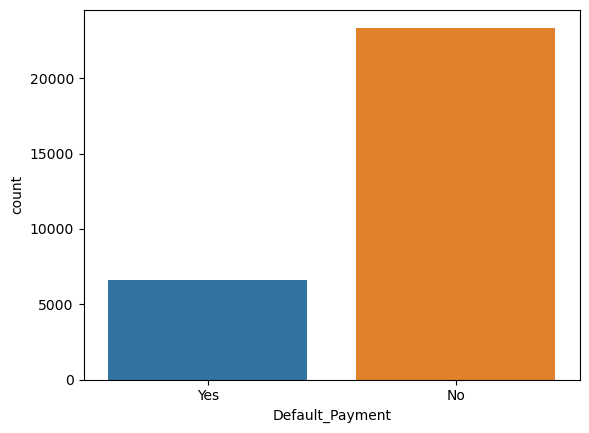

In [28]:
sns.countplot(final['Default_Payment'])
plt.show()

In [29]:
final['Default_Payment'].value_counts() / final.shape[0]

No     0.7788
Yes    0.2212
Name: Default_Payment, dtype: float64

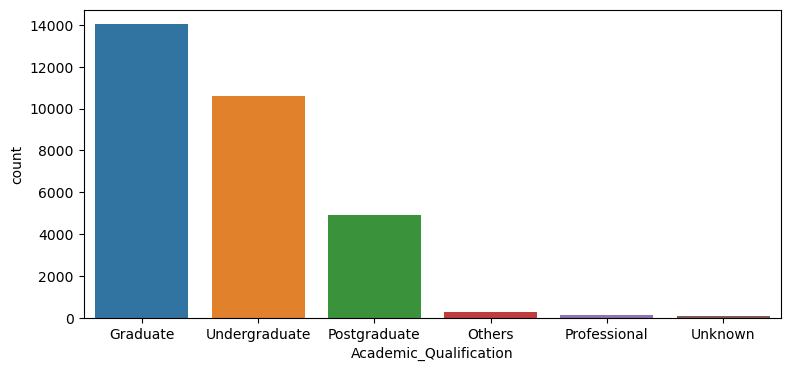

In [30]:
plt.figure(figsize=(9,4))
sns.countplot(final['Academic_Qualification'])
plt.show()

In [31]:
final['Gender'].value_counts()

Female    18112
Male      11888
Name: Gender, dtype: int64

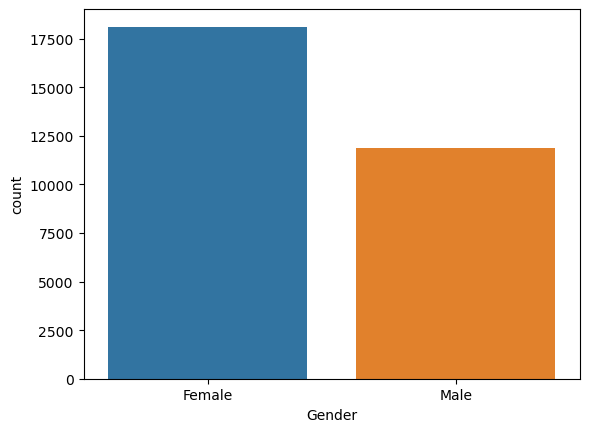

In [32]:
sns.countplot(final['Gender'])
plt.show()

In [33]:
final['Marital'].value_counts()

Single     15964
Married    13659
Unknown      377
Name: Marital, dtype: int64

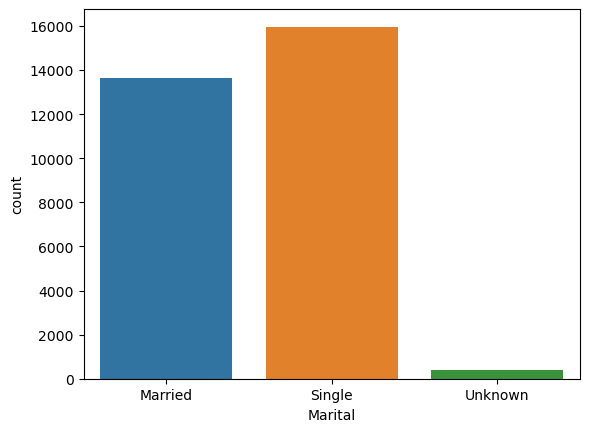

In [34]:
sns.countplot(final['Marital'])
plt.show()

# Bivariate Analysis--> Continuous Vs Continuous

In [35]:
final.corr()

,Customer ID,Credit_Amount,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
Customer ID,1.000000,0.026884,0.018678,-0.020016,-0.009494,-0.018233,0.013914,-0.020911,-0.033201,0.014824,0.020680,0.019882,0.035671,0.016959,0.016620,0.009667,0.008546,0.037526,0.008646,0.003044,0.003000
Credit_Amount,0.026884,1.000000,0.135357,-0.174325,-0.200720,-0.196130,-0.185646,-0.173779,-0.168446,0.287284,0.280384,0.288211,0.298477,0.304191,0.300507,0.179265,0.141631,0.202709,0.187128,0.201680,0.206527
Age_Years,0.018678,0.135357,1.000000,-0.001731,-0.008871,-0.014417,-0.007554,-0.013825,-0.017838,0.049506,0.055387,0.048118,0.046557,0.049390,0.047581,0.025527,0.017073,0.029415,0.019102,0.020990,0.019478
Repayment_Status_Jan,-0.020016,-0.174325,-0.001731,1.000000,0.693003,0.514561,0.458840,0.424479,0.374067,-0.007562,0.004704,0.008045,0.014829,0.028830,0.028195,-0.077731,-0.049604,-0.060884,-0.061679,-0.052780,-0.049247
Repayment_Status_Feb,-0.009494,-0.200720,-0.008871,0.693003,1.000000,0.665755,0.516174,0.466563,0.409739,0.008046,0.012422,0.020038,0.027517,0.039775,0.041686,-0.095057,-0.047360,-0.057354,-0.052995,-0.047588,-0.043179
Repayment_Status_March,-0.018233,-0.196130,-0.014417,0.514561,0.665755,1.000000,0.676816,0.545319,0.485370,-0.019061,-0.001877,0.002878,0.014783,0.027169,0.029943,-0.037527,-0.062930,-0.054400,-0.051804,-0.049878,-0.048582
Repayment_Status_April,0.013914,-0.185646,-0.007554,0.458840,0.516174,0.676816,1.000000,0.733334,0.585659,-0.020643,-0.012412,0.004098,0.014207,0.029246,0.035272,-0.052848,-0.033120,-0.071102,-0.054316,-0.052649,-0.049148
Repayment_Status_May,-0.020911,-0.173779,-0.013825,0.424479,0.466563,0.545319,0.733334,1.000000,0.728525,-0.014294,-0.009265,0.005453,0.024006,0.038873,0.045326,-0.052188,-0.034723,-0.035942,-0.065062,-0.051286,-0.046448
Repayment_Status_June,-0.033201,-0.168446,-0.017838,0.374067,0.409739,0.485370,0.585659,0.728525,1.000000,-0.014241,-0.011020,0.005165,0.020387,0.044082,0.048396,-0.046659,-0.033983,-0.038381,-0.029725,-0.066544,-0.045623
Jan_Bill_Amount,0.014824,0.287284,0.049506,-0.007562,0.008046,-0.019061,-0.020643,-0.014294,-0.014241,1.000000,0.835863,0.857459,0.822940,0.755633,0.735458,0.116476,0.077758,0.120630,0.130299,0.143668,0.152062


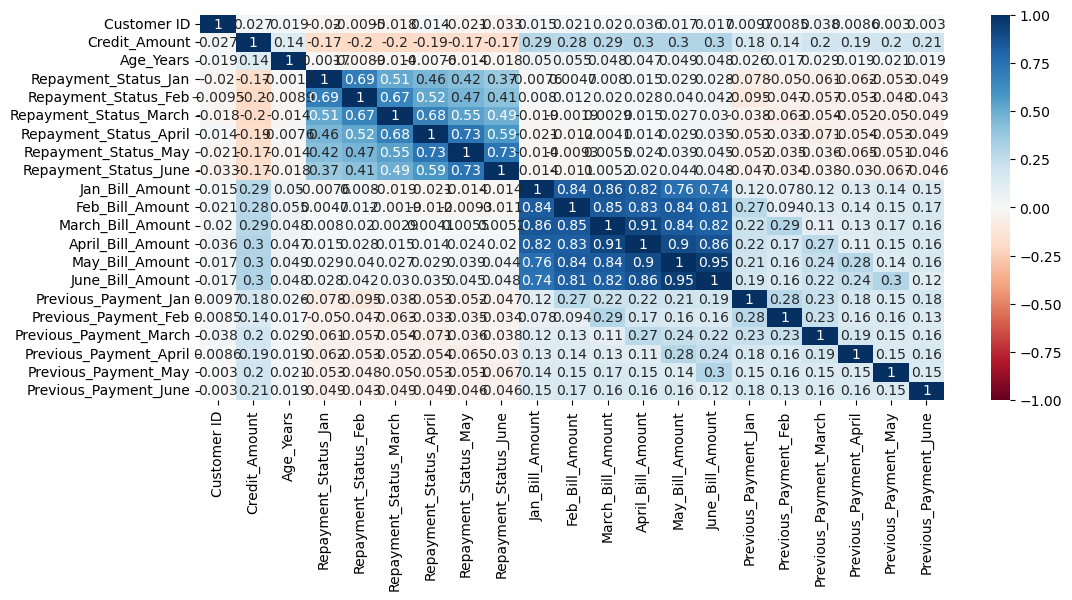

In [36]:
plt.figure(figsize=(12,5))
sns.heatmap(final.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu')
plt.show()

# Bivariate Analysis--> Categorical Vs Categorical

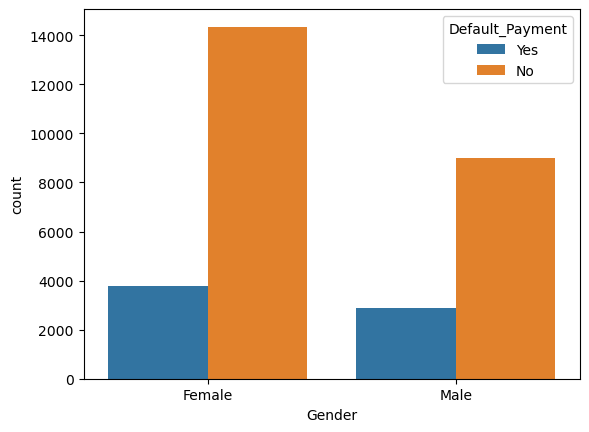

In [37]:
sns.countplot(final['Gender'],hue=final['Default_Payment'])
plt.show()

In [38]:
new_gender = final.groupby(by=['Gender','Default_Payment'])['Default_Payment'].count()

In [39]:
new_gender

Gender  Default_Payment
Female  No                 14349
        Yes                 3763
Male    No                  9015
        Yes                 2873
Name: Default_Payment, dtype: int64

In [40]:
# Defaulter Female and male Percentage out of male and Female
print('Female Defaulter percentage:- %.2f%%'%(new_gender['Female'][1]/(new_gender['Female'][1]+new_gender['Female'][0])*100))
print('Male Defaulter percentage:-%.2f%%'%(new_gender['Male'][1]/(new_gender['Male'][1]+new_gender['Male'][0])*100))

Female Defaulter percentage:- 20.78%
Male Defaulter percentage:-24.17%


In [41]:
# Non Defaulter Female and male Percentage out of male and Female
print('Non Female Defaulter percentage:- %.2f%%'%(new_gender['Female'][0]/(new_gender['Female'][1]+new_gender['Female'][0])*100))
print('Non Male Defaulter percentage:- %.2f%%'%(new_gender['Male'][0]/(new_gender['Male'][1]+new_gender['Male'][0])*100))

Non Female Defaulter percentage:- 79.22%
Non Male Defaulter percentage:- 75.83%


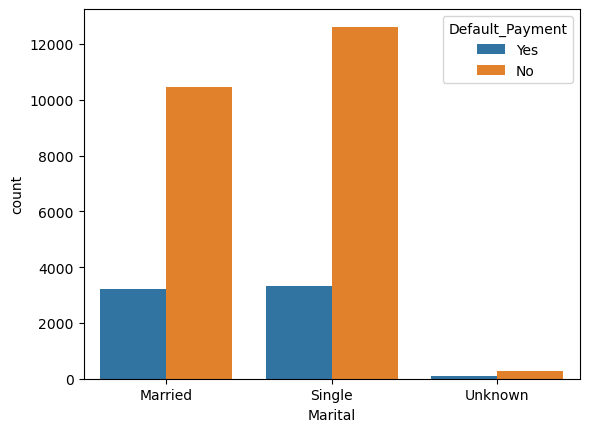

In [42]:
sns.countplot(final['Marital'],hue=final['Default_Payment'])
plt.show()

In [43]:
Marital_s = final.groupby(by=['Marital','Default_Payment'])['Default_Payment'].count()

In [44]:
Marital_s

Marital  Default_Payment
Married  No                 10453
         Yes                 3206
Single   No                 12623
         Yes                 3341
Unknown  No                   288
         Yes                   89
Name: Default_Payment, dtype: int64

In [45]:
print('Defaulter Married percentege out of Married:-%.2f%%'%(Marital_s['Married'][1]/(Marital_s['Married'][0] + Marital_s['Married'][1])*100))
print('Defaulter Single percentege out of Single:-%.2f%%'%(Marital_s['Single'][1]/(Marital_s['Single'][0] + Marital_s['Single'][1])*100))
print('Defaulter Unknown percentege out of Unknown:-%.2f%%'%(Marital_s['Unknown'][1]/(Marital_s['Unknown'][0] + Marital_s['Unknown'][1])*100))

Defaulter Married percentege out of Married:-23.47%
Defaulter Single percentege out of Single:-20.93%
Defaulter Unknown percentege out of Unknown:-23.61%


In [46]:
print('Non Defaulter Married percentege out of Married:-%.2f%%'%(Marital_s['Married'][0]/(Marital_s['Married'][0] + Marital_s['Married'][1])*100))
print('Non Defaulter Single percentege out of Single:-%.2f%%'%(Marital_s['Single'][0]/(Marital_s['Single'][0] + Marital_s['Single'][1])*100))
print('Non Defaulter Unknown percentege out of Unknown:-%.2f%%'%(Marital_s['Unknown'][0]/(Marital_s['Unknown'][0] + Marital_s['Unknown'][1])*100))

Non Defaulter Married percentege out of Married:-76.53%
Non Defaulter Single percentege out of Single:-79.07%
Non Defaulter Unknown percentege out of Unknown:-76.39%


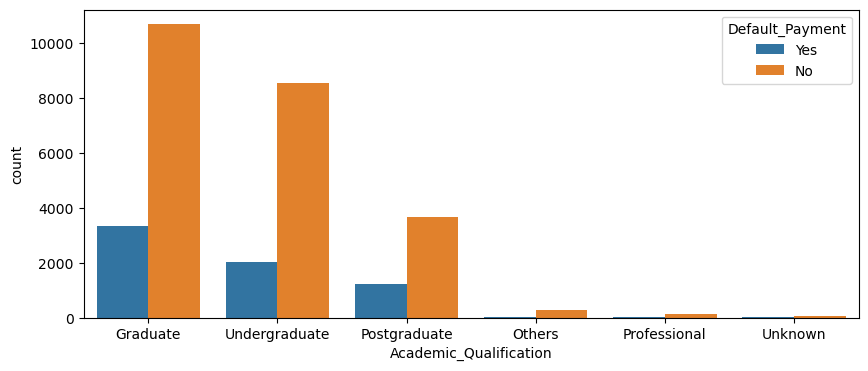

In [47]:
plt.figure(figsize=(10,4))
sns.countplot(final['Academic_Qualification'],hue=final['Default_Payment'])
plt.show()

In [48]:
Acad_Qu = final.groupby(by=['Academic_Qualification','Default_Payment'])['Default_Payment'].count()

In [49]:
Acad_Qu

Academic_Qualification  Default_Payment
Graduate                No                 10700
                        Yes                 3330
Others                  No                   262
                        Yes                   18
Postgraduate            No                  3680
                        Yes                 1237
Professional            No                   116
                        Yes                    7
Undergraduate           No                  8549
                        Yes                 2036
Unknown                 No                    57
                        Yes                    8
Name: Default_Payment, dtype: int64

In [50]:
print('Defaulter graduate percentage out of graduate:-%.2f%%'%(Acad_Qu['Graduate'][1]/(Acad_Qu['Graduate'][0]+Acad_Qu['Graduate'][1])*100))
print('Defaulter others percentege out of others:-%.2f%%'%(Acad_Qu['Others'][1]/(Acad_Qu['Others'][1]+Acad_Qu['Others'][0])*100))
print('Defaulter postgraduate precentage out of postgraduate:-%.2f%%'%(Acad_Qu['Postgraduate'][1]/(Acad_Qu['Postgraduate'][0]+Acad_Qu['Postgraduate'][1])*100))
print('Defaulter professional percentage out of professional:-%.2f%%'%(Acad_Qu['Professional'][1]/(Acad_Qu['Professional'][0]+Acad_Qu['Professional'][1])*100))
print('Defaulter Undergraduate percentage out of Undergraduate:-%.2f%%'%(Acad_Qu['Undergraduate'][1]/(Acad_Qu['Undergraduate'][0]+Acad_Qu['Undergraduate'][1])*100))
print('Defaulter Unknown percentage out of Unknown:-%.2f%%'%(Acad_Qu['Unknown'][1]/(Acad_Qu['Unknown'][0]+Acad_Qu['Unknown'][1])*100))

Defaulter graduate percentage out of graduate:-23.73%
Defaulter others percentege out of others:-6.43%
Defaulter postgraduate precentage out of postgraduate:-25.16%
Defaulter professional percentage out of professional:-5.69%
Defaulter Undergraduate percentage out of Undergraduate:-19.23%
Defaulter Unknown percentage out of Unknown:-12.31%


In [51]:
print('Non Defaulter graduate percentage out of graduate:-%.2f%%'%(Acad_Qu['Graduate'][0]/(Acad_Qu['Graduate'][0]+Acad_Qu['Graduate'][1])*100))
print('Non Defaulter others percentege out of others:-%.2f%%'%(Acad_Qu['Others'][0]/(Acad_Qu['Others'][1]+Acad_Qu['Others'][0])*100))
print('Non Defaulter postgraduate precentage out of postgraduate:-%.2f%%'%(Acad_Qu['Postgraduate'][0]/(Acad_Qu['Postgraduate'][0]+Acad_Qu['Postgraduate'][1])*100))
print('Non Defaulter professional percentage out of professional:-%.2f%%'%(Acad_Qu['Professional'][0]/(Acad_Qu['Professional'][0]+Acad_Qu['Professional'][1])*100))
print('Non Defaulter Undergraduate percentage out of Undergraduate:-%.2f%%'%(Acad_Qu['Undergraduate'][0]/(Acad_Qu['Undergraduate'][0]+Acad_Qu['Undergraduate'][1])*100))
print('Non Defaulter Unknown percentage out of Unknown:-%.2f%%'%(Acad_Qu['Unknown'][0]/(Acad_Qu['Unknown'][0]+Acad_Qu['Unknown'][1])*100))

Non Defaulter graduate percentage out of graduate:-76.27%
Non Defaulter others percentege out of others:-93.57%
Non Defaulter postgraduate precentage out of postgraduate:-74.84%
Non Defaulter professional percentage out of professional:-94.31%
Non Defaulter Undergraduate percentage out of Undergraduate:-80.77%
Non Defaulter Unknown percentage out of Unknown:-87.69%


# Based on Groupby Analysis

In [52]:
final.groupby(['Age_Years','Default_Payment','Gender','Marital']).size().reset_index().rename(columns={0:'Age_Years_count'}).head(4)

,Age_Years,Default_Payment,Gender,Marital,Age_Years_count
0,21,No,Female,Married,5
1,21,No,Female,Single,32
2,21,No,Male,Married,1
3,21,No,Male,Single,15


In [53]:
cate = final.columns[final.dtypes == object]

<Figure size 640x480 with 0 Axes>

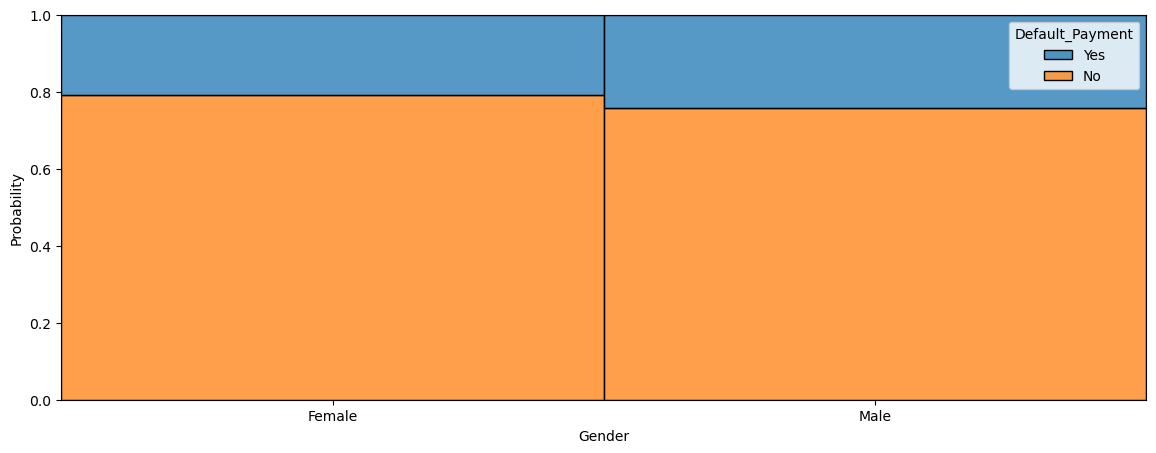

<Figure size 640x480 with 0 Axes>

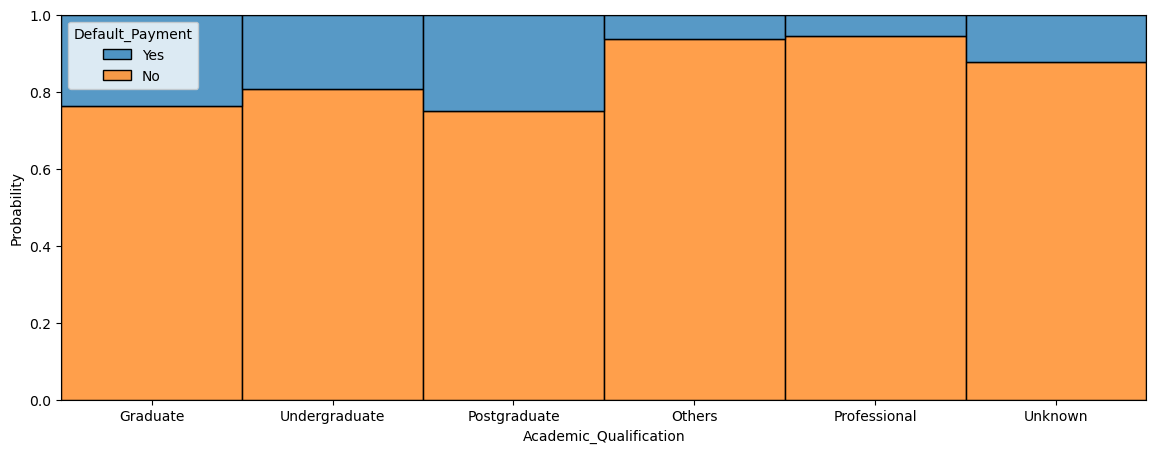

<Figure size 640x480 with 0 Axes>

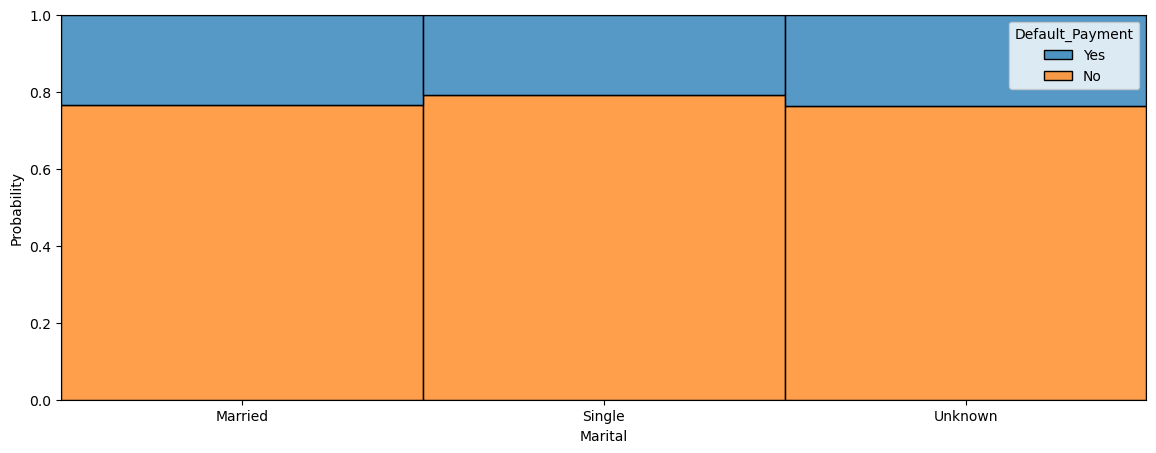

In [54]:
# Bivariate Analysis --> Categorical Ind vs Categorical Dep
for i in cate:
    if i!='Default_Payment':
        figure()
        plt.figure(figsize=(14,5))
        sns.histplot(final,x=i,hue='Default_Payment',stat='probability',multiple='fill')
        plt.show()

# Bivariate Analysis --> Continuous Vs Categorical

In [55]:
num = final.columns[final.dtypes != object]

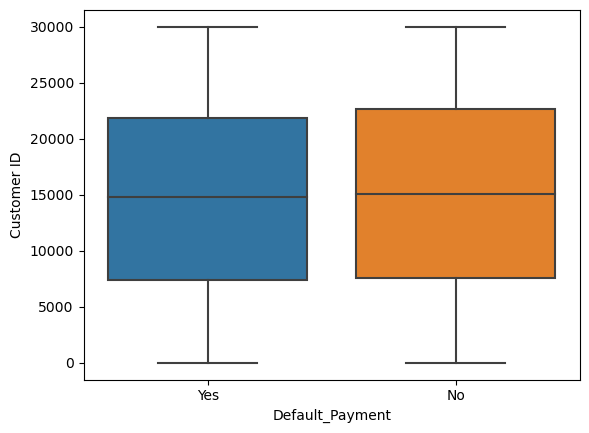

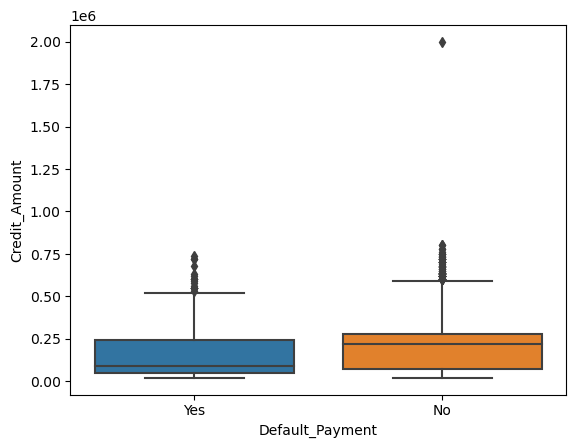

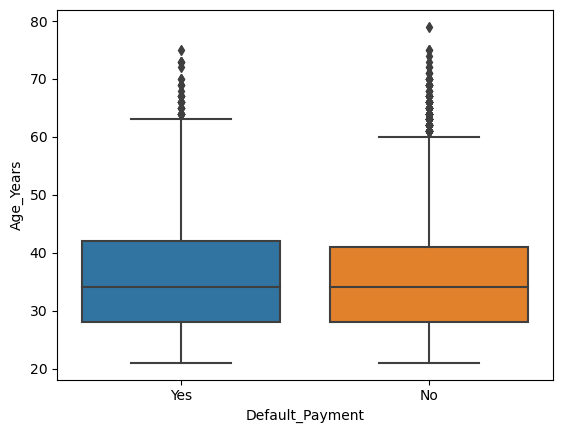

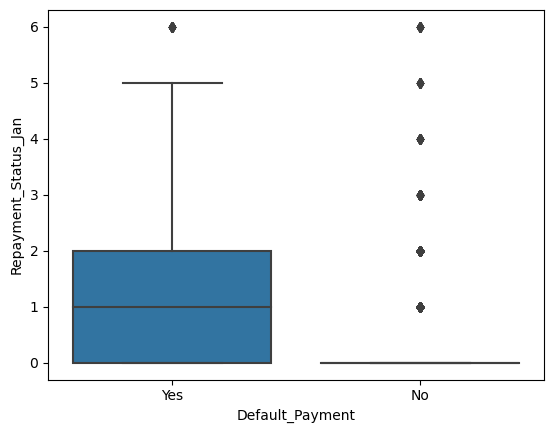

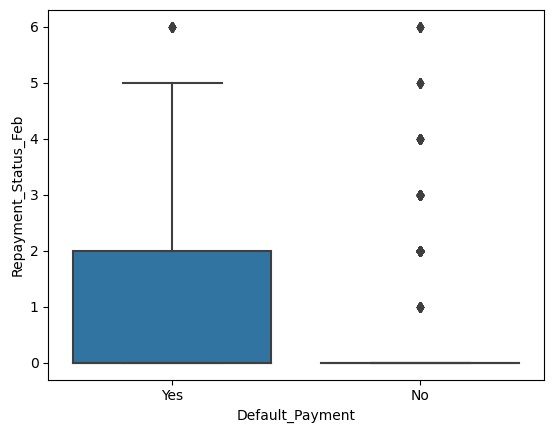

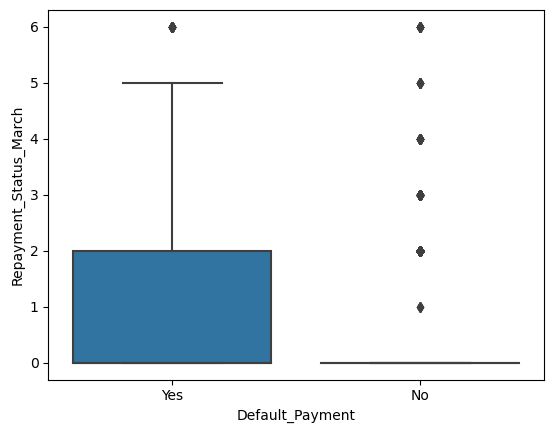

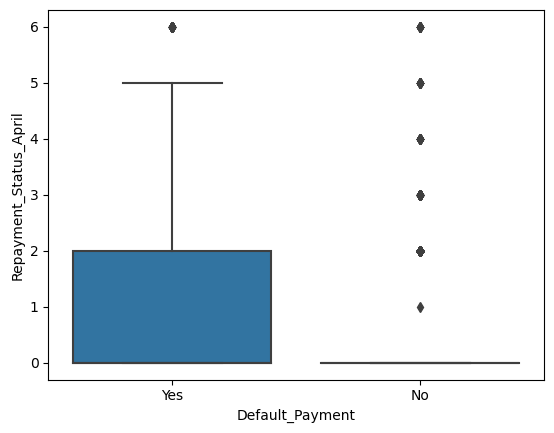

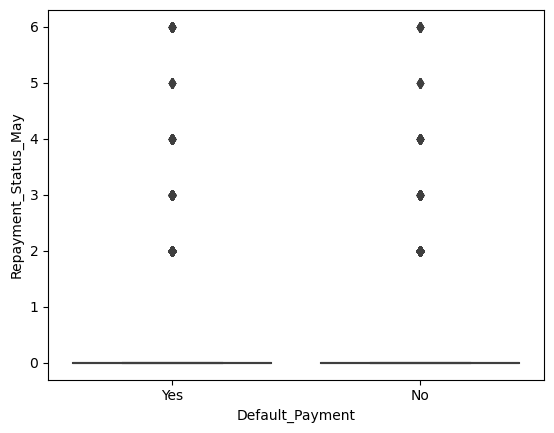

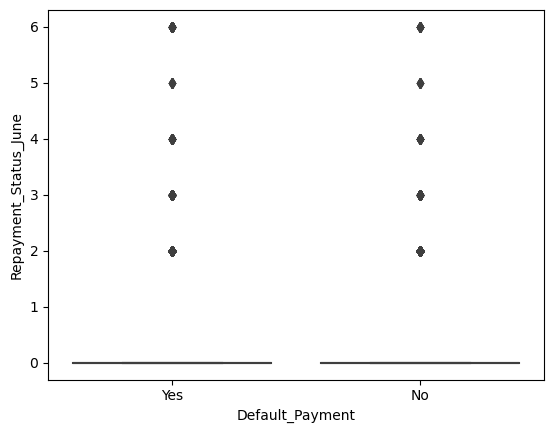

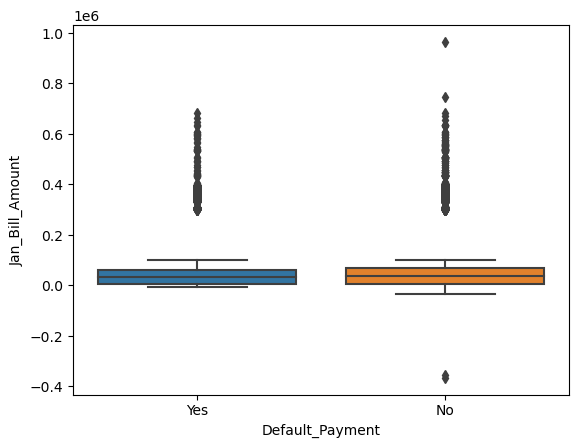

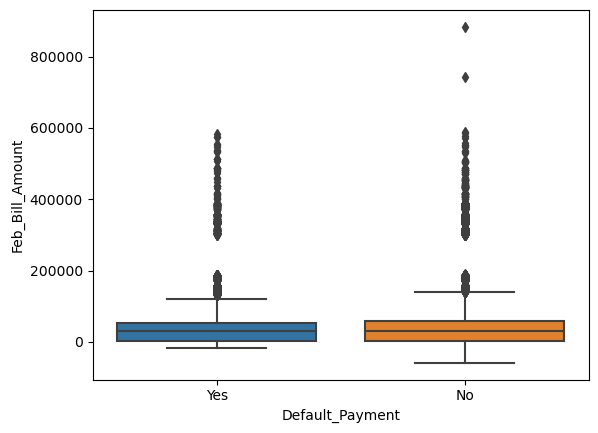

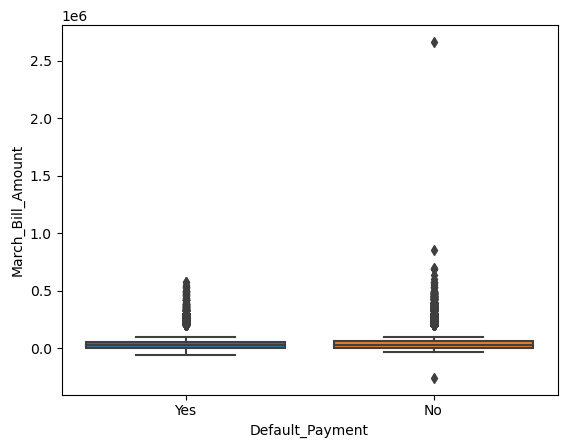

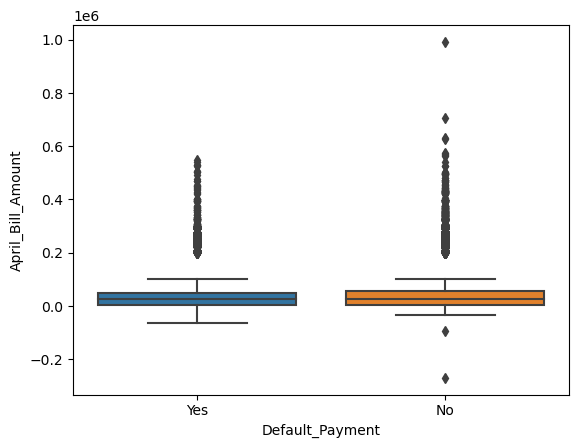

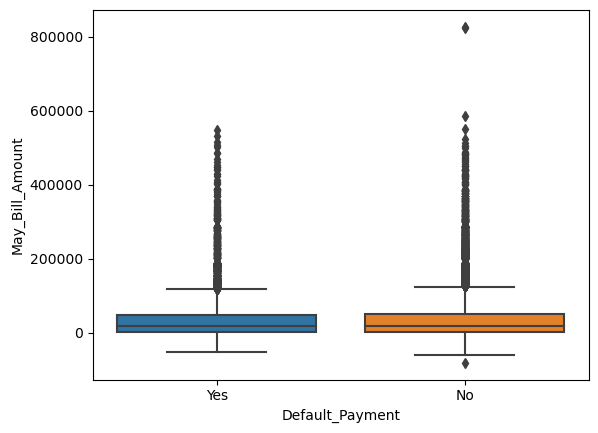

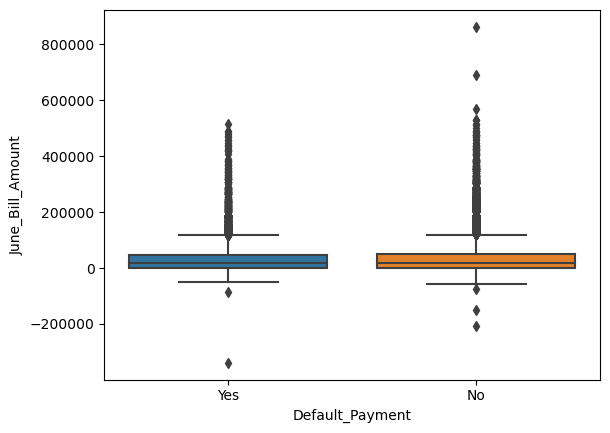

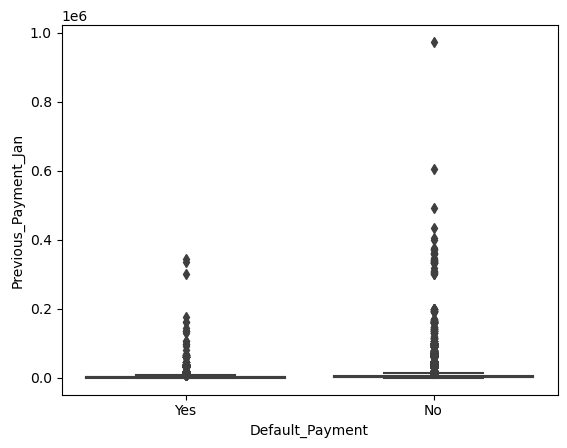

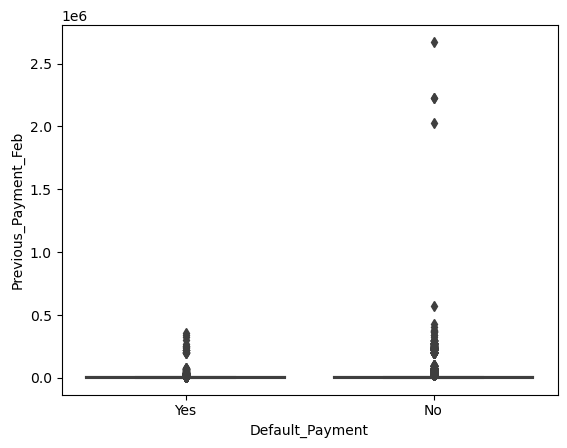

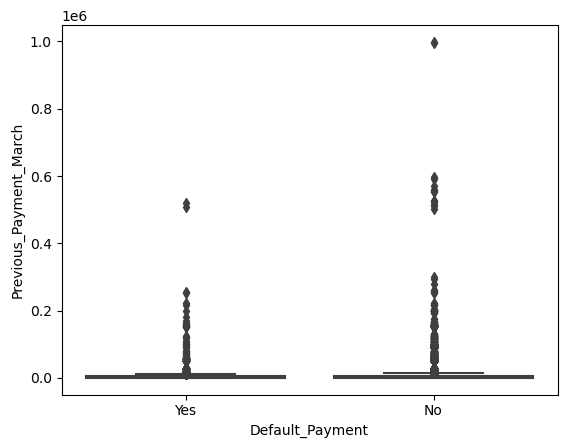

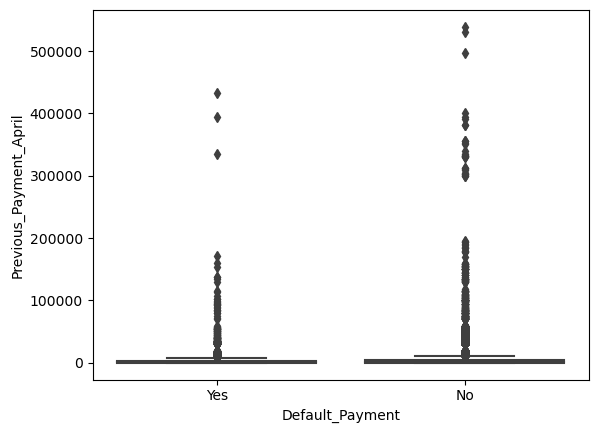

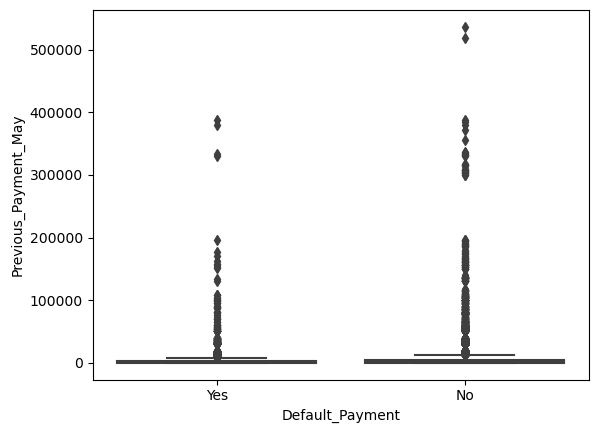

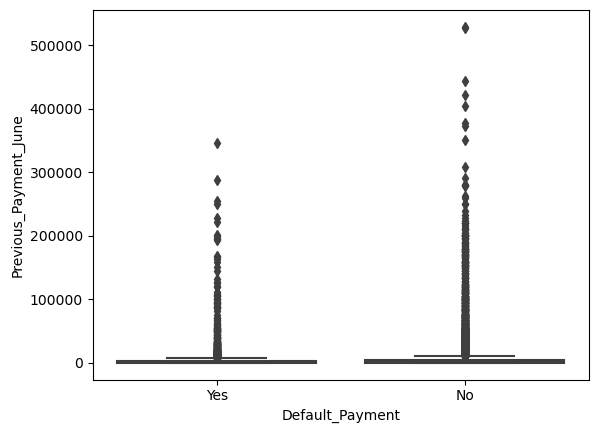

In [56]:
for i in num:
    figure()
    sns.boxplot(y=final[i],x=final['Default_Payment'])

# Perform some Statistical Test

In [57]:
observed = pd.crosstab(final['Academic_Qualification'],final['Default_Payment'])

In [58]:
observed

Default_Payment,No,Yes
Academic_Qualification,,
Graduate,10700,3330
Others,262,18
Postgraduate,3680,1237
Professional,116,7
Undergraduate,8549,2036
Unknown,57,8


In [59]:
# H0 --> Academic_Qualification does not impact on Default_Payment
# H1 --> Academic_Qualification Impact on Default_Payment
chi,p,dof,expected = chi2_contingency(observed)
print('Chi_square:-',chi)
print('p_value:-',p)
if p>0.05:
    print('Accept the Nullhypothesis')
else:
    print('Accept the Alternatehypothesis')

Chi_square:- 161.64759230691146
p_value:- 4.409392797257044e-33
Accept the Alternatehypothesis


# Data preprocessing --> Feature Engineering

# Feature Selection

In [60]:
final.drop(columns=['Customer ID'],inplace=True)

In [61]:
final.head(2)

,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,20000.0,Female,Graduate,Married,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,Yes
1,220000.0,Female,Graduate,Single,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,Yes


# Capping Outliers

In [62]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit_Amount,30000.0,192917.322667,132288.752980,20000.0,50000.00,220000.0,270000.00,2000000.0
Age_Years,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
Repayment_Status_Jan,30000.0,0.355200,0.746984,0.0,0.00,0.0,0.00,6.0
Repayment_Status_Feb,30000.0,0.319300,0.796012,0.0,0.00,0.0,0.00,6.0
Repayment_Status_March,30000.0,0.302967,0.781792,0.0,0.00,0.0,0.00,6.0
Repayment_Status_April,30000.0,0.256700,0.743880,0.0,0.00,0.0,0.00,6.0
Repayment_Status_May,30000.0,0.219500,0.699954,0.0,0.00,0.0,0.00,6.0
Repayment_Status_June,30000.0,0.224900,0.700573,0.0,0.00,0.0,0.00,6.0
Jan_Bill_Amount,30000.0,81581.060100,123026.372701,-365580.0,3890.00,35661.5,67091.00,964533.0
Feb_Bill_Amount,30000.0,52517.103000,80401.365192,-58777.0,3517.00,30538.0,57420.50,883831.0


In [63]:
num = final.columns[final.dtypes != object]

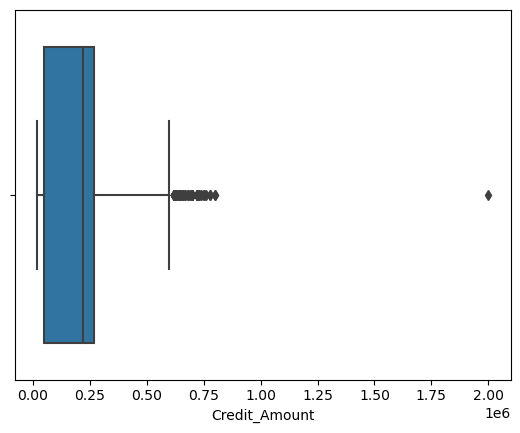

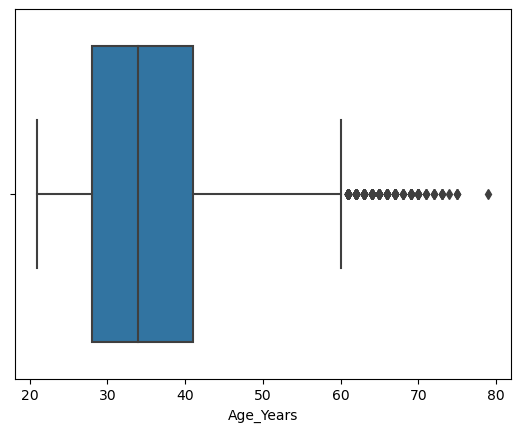

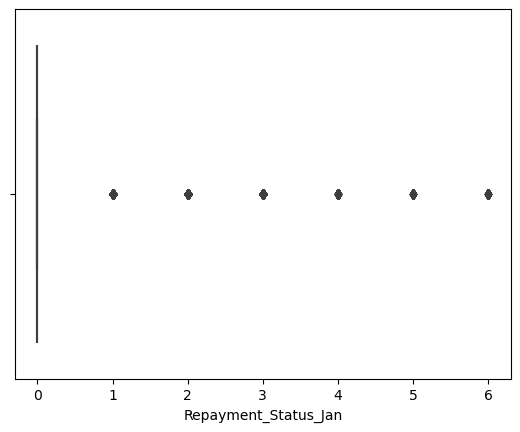

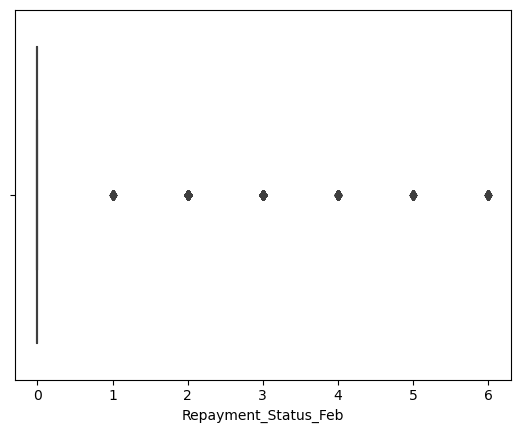

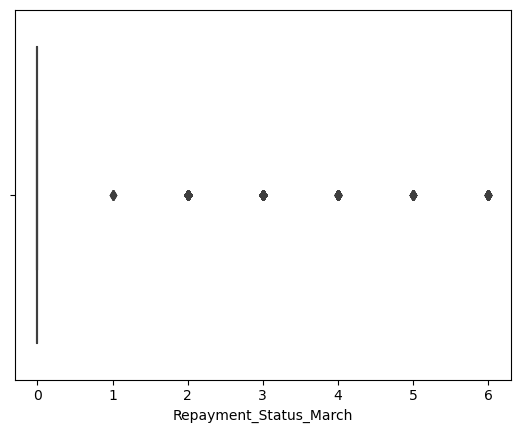

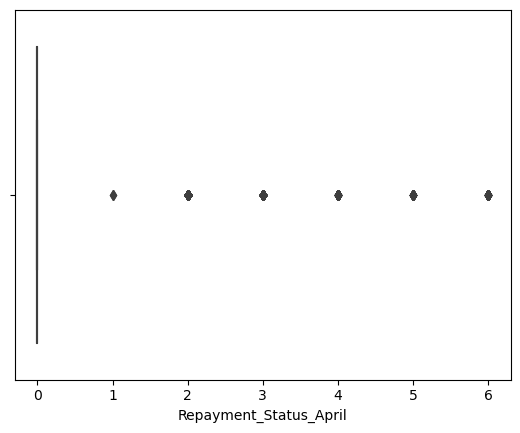

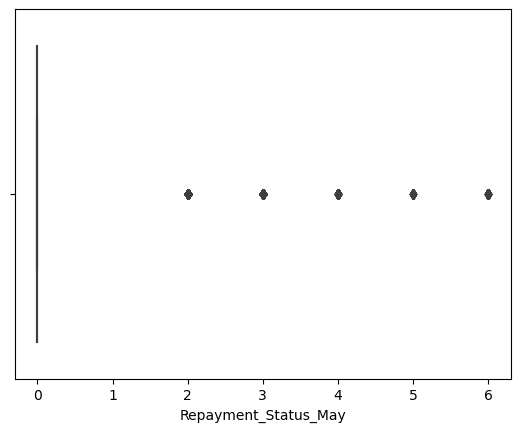

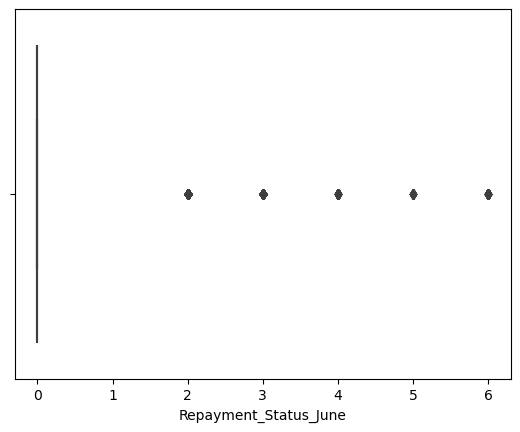

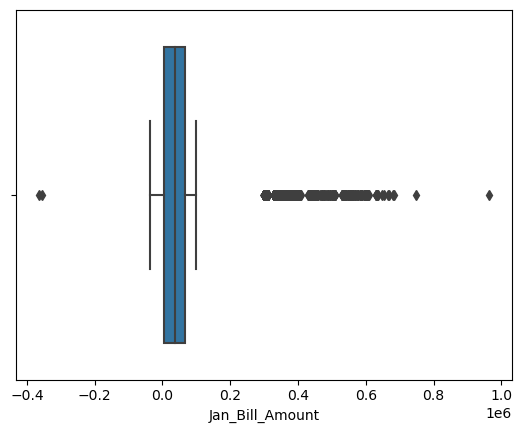

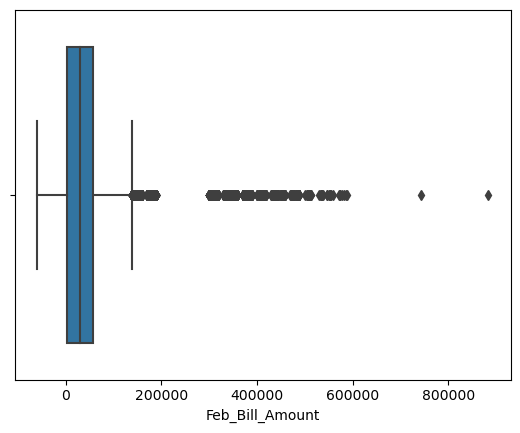

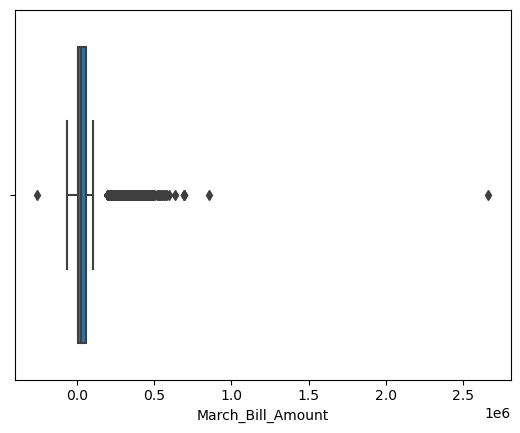

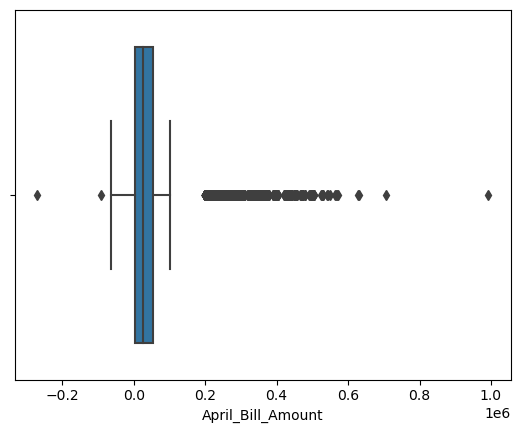

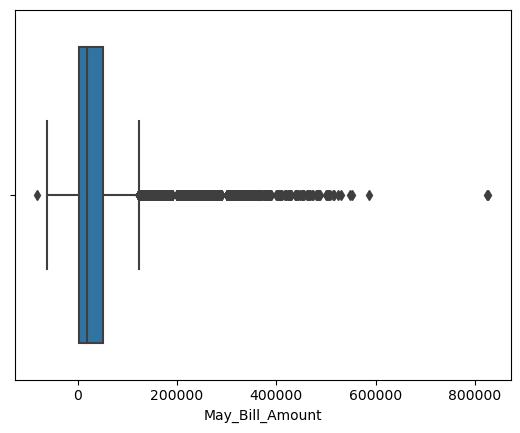

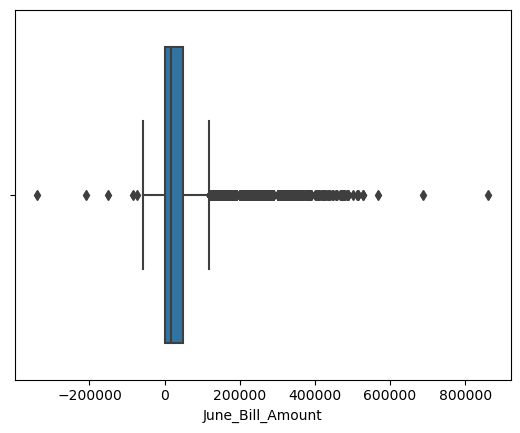

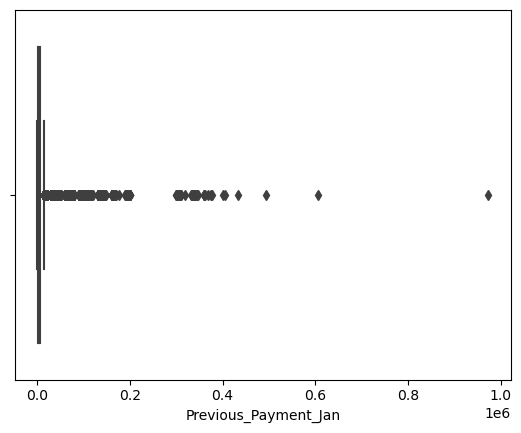

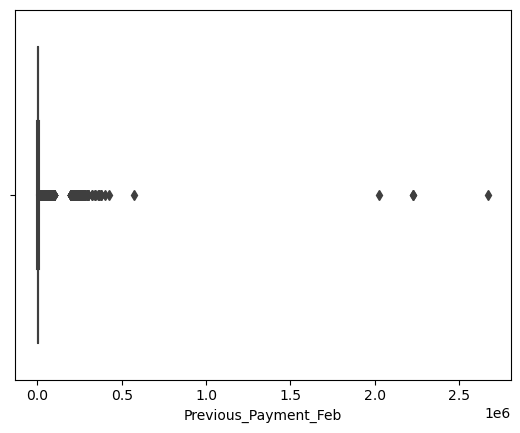

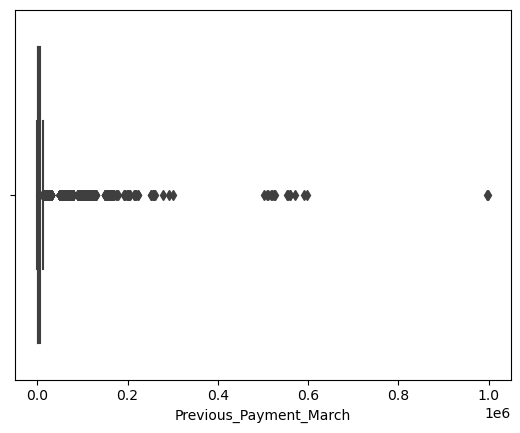

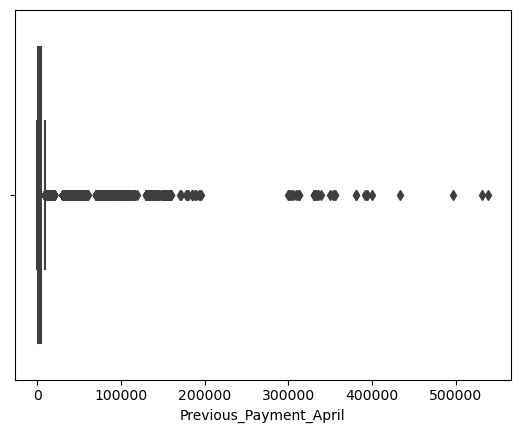

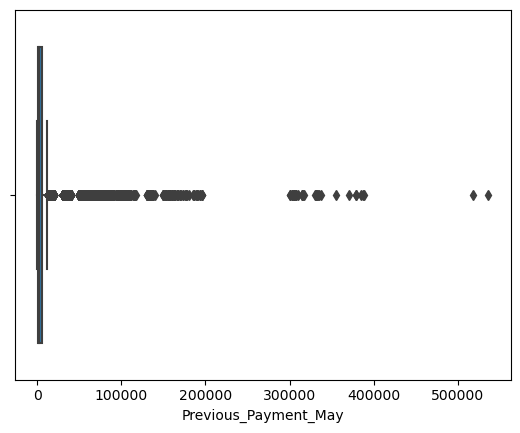

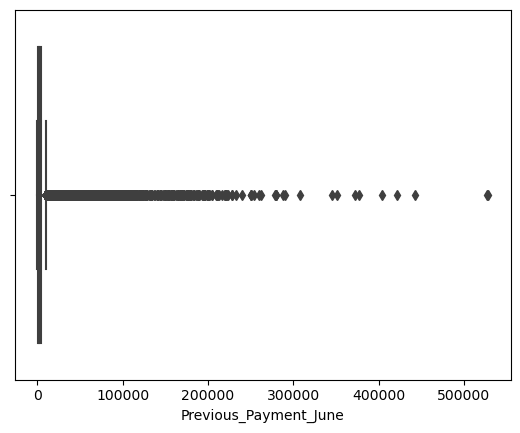

In [64]:
for i in num:
    figure()
    sns.boxplot(final[i])

In [65]:
for column in num:
    Q3 = np.percentile(final[column],75)
    Q1 = np.percentile(final[column],25)
    IQR = Q3-Q1
    upper_Bound = Q3+(1.5*IQR)
    lower_Bound = Q1-(1.5*IQR)
    final[column] = np.where(
        final[column]>upper_Bound,
        upper_Bound,final[column])
    final[column] = np.where(
        final[column]<lower_Bound,
        lower_Bound,final[column]

    )

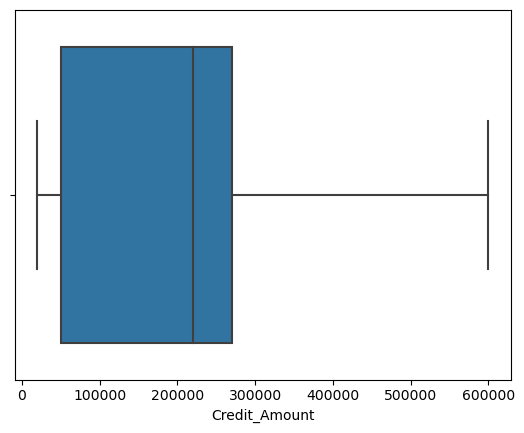

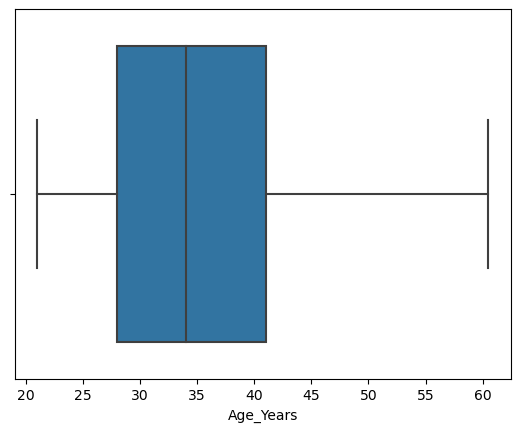

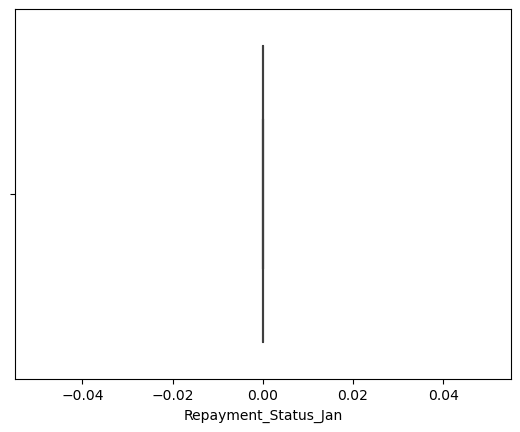

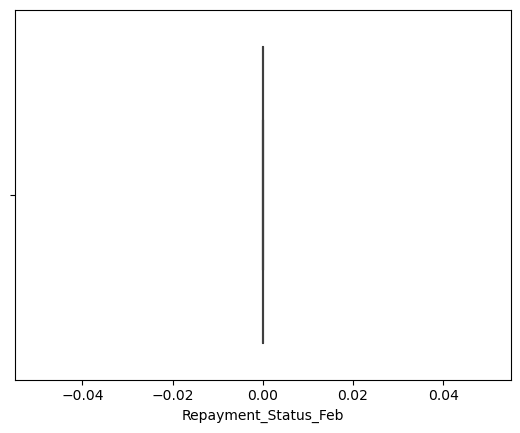

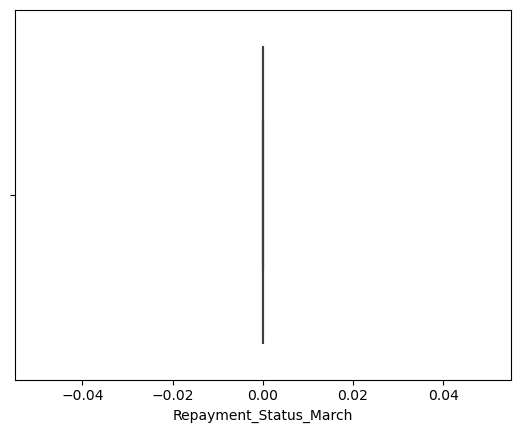

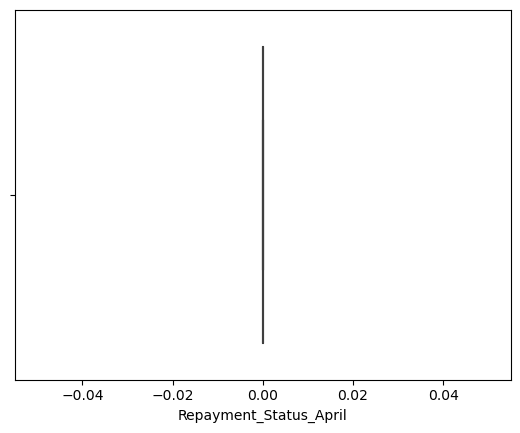

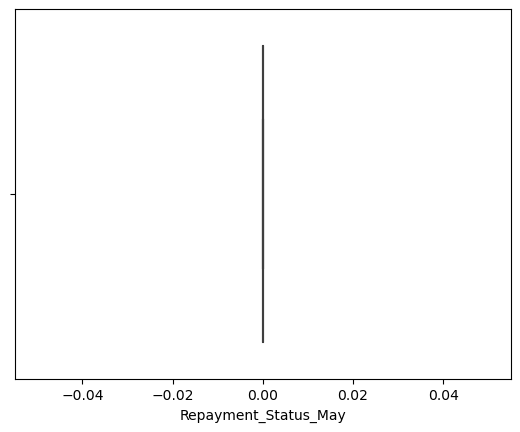

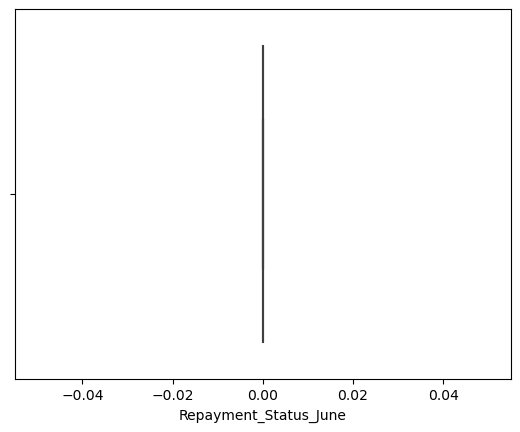

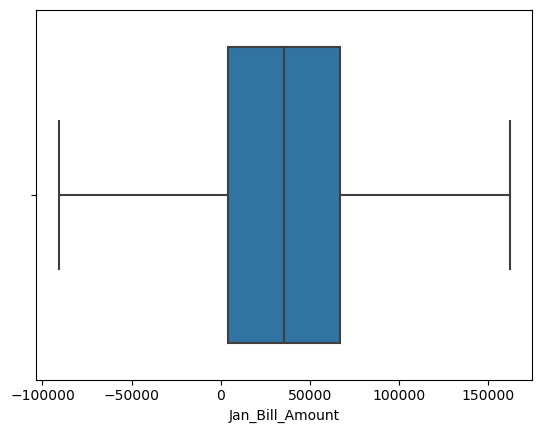

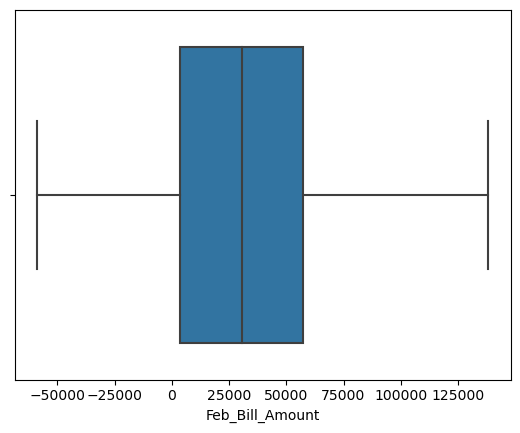

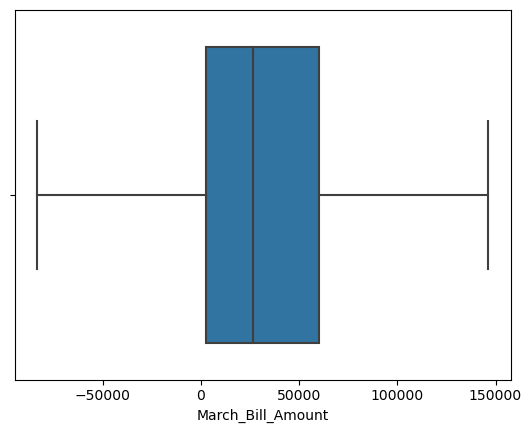

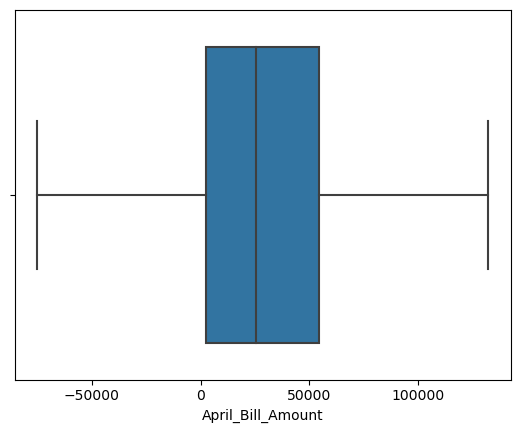

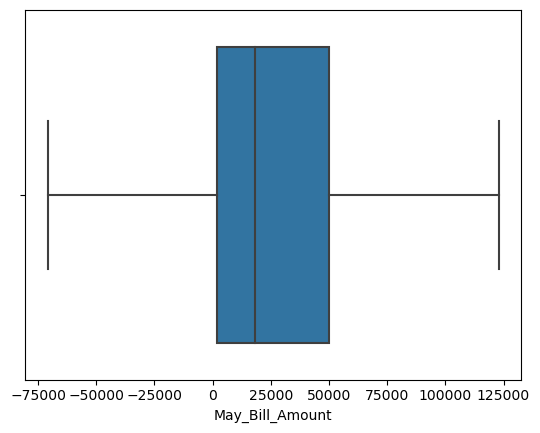

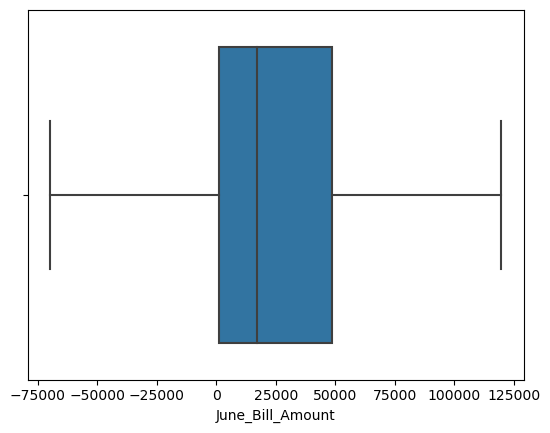

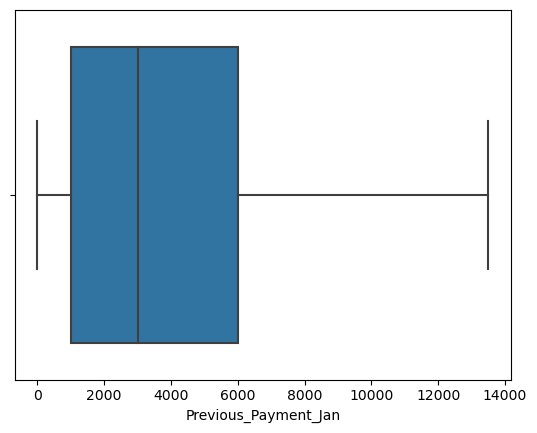

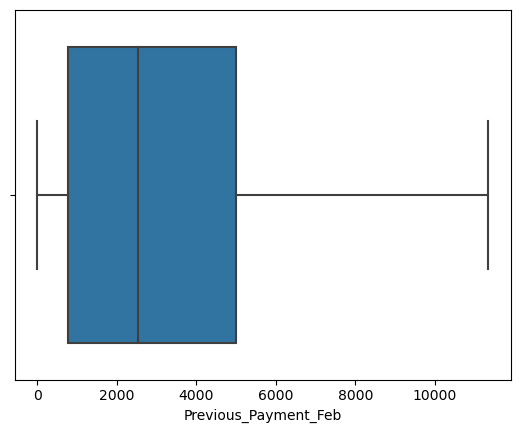

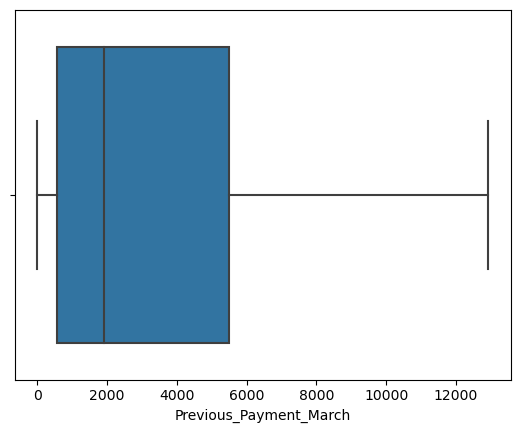

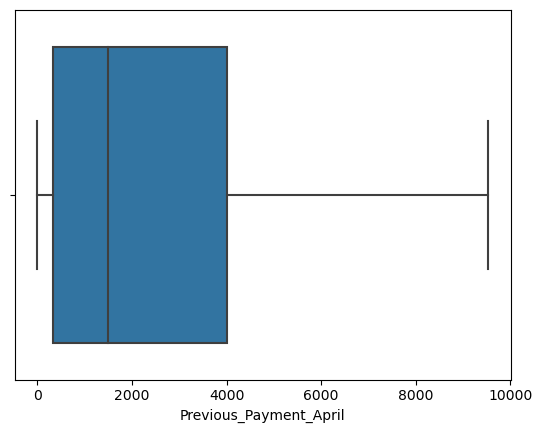

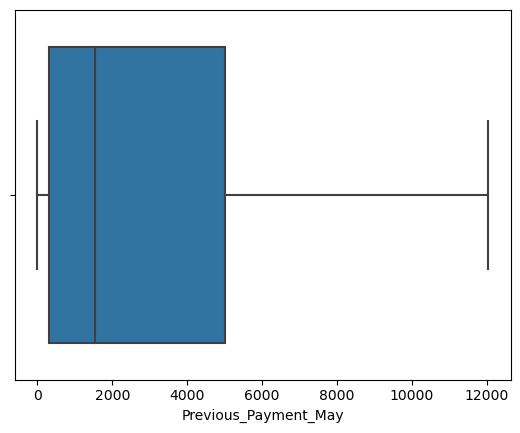

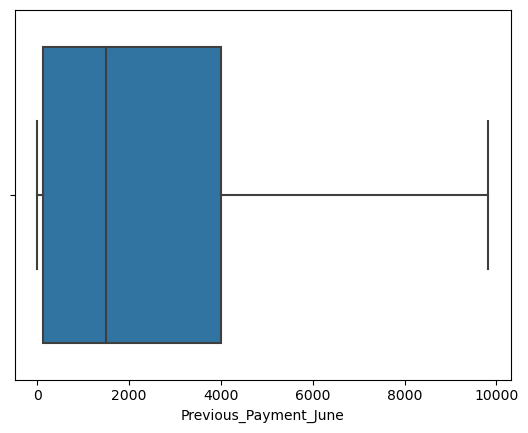

In [66]:
for i in num:
    figure()
    sns.boxplot(final[i])

# Missing value Imputation

In [67]:
final.isnull().sum()

Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

# Add constant 

In [68]:
final = add_constant(final)

# Check Multicollinearty 

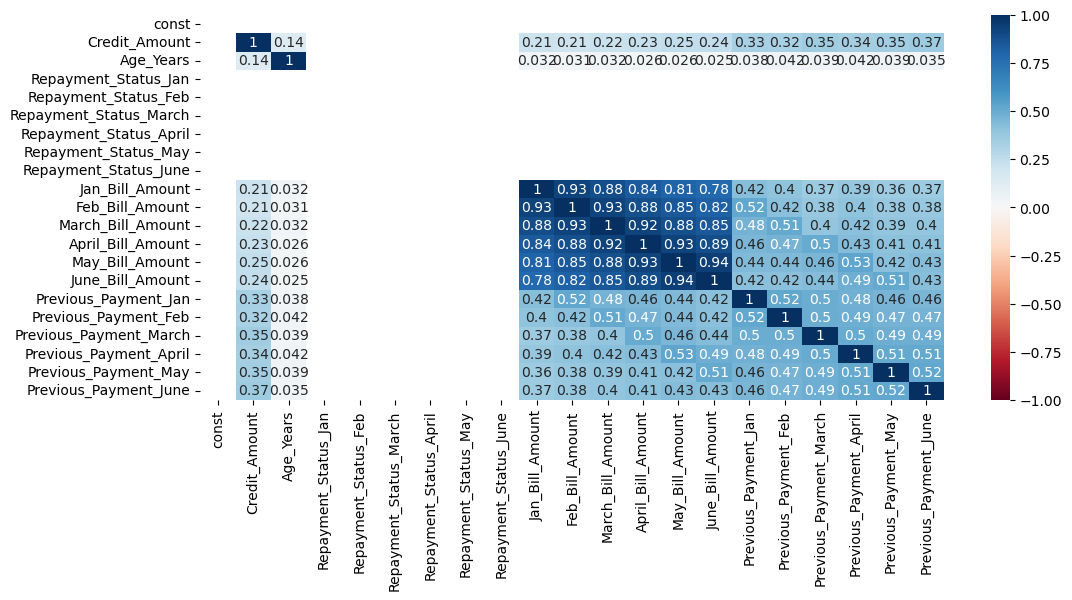

In [69]:
plt.figure(figsize=(12,5))
sns.heatmap(final.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

In [70]:
# Remove All Multicollinearty columns
final.drop(columns=['Feb_Bill_Amount','March_Bill_Amount','April_Bill_Amount','May_Bill_Amount','June_Bill_Amount'],inplace=True)

# Data Devide into Two parts

In [71]:
X = final.drop(columns=['Default_Payment'],axis=1)
y = final['Default_Payment']

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,train_size=0.80)

In [73]:
X_train.head(2)

,const,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
19682,1.0,200000.0,Female,Graduate,Married,46.0,0.0,0.0,0.0,0.0,0.0,0.0,161892.5,3693.0,5000.0,5500.0,3500.0,3930.0,1500.0
11062,1.0,220000.0,Female,Undergraduate,Married,32.0,0.0,0.0,0.0,0.0,0.0,0.0,3556.0,663.0,326.0,576.0,803.0,0.0,326.0


In [74]:
X_test.head(2)

,const,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
25665,1.0,40000.0,Female,Graduate,Single,26.0,0.0,0.0,0.0,0.0,0.0,0.0,38993.0,1300.0,2000.0,0.0,9533.625,680.0,9823.375
16464,1.0,80000.0,Female,Postgraduate,Married,59.0,0.0,0.0,0.0,0.0,0.0,0.0,75663.0,3313.0,2206.0,2000.0,1503.000,1903.0,2006.000


# Ordinal Encoding

In [75]:
final.head(3)

,const,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1.0,20000.0,Female,Graduate,Married,24.0,0.0,0.0,0.0,0.0,0.0,0.0,3933.0,0.0,679.0,0.0,0.0,0.0,0.0,Yes
1,1.0,220000.0,Female,Graduate,Single,26.0,0.0,0.0,0.0,0.0,0.0,0.0,3683.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,Yes
2,1.0,90000.0,Female,Graduate,Single,34.0,0.0,0.0,0.0,0.0,0.0,0.0,39339.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,No


In [76]:
transformer = ColumnTransformer(transformers=[
    ('tnf2',OrdinalEncoder(categories=[['Female','Male']]),['Gender']),
    ('trf3',OrdinalEncoder(categories=[['Graduate','Undergraduate','Postgraduate','Others','Professional','Unknown']]),['Academic_Qualification']),
    ('trf4',OrdinalEncoder(categories=[['Single','Married','Unknown']]),['Marital']),
],remainder='passthrough')

In [77]:
X_t = transformer.fit_transform(X_train)

In [78]:
X_tr = transformer.fit_transform(X_test)

In [79]:
trainX_transform = pd.DataFrame(X_t, columns = X_train.columns)
testX_transform = pd.DataFrame(X_tr, columns = X_test.columns)

In [80]:
trainX_transform.head(2)

,const,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
0,0.0,0.0,1.0,1.0,200000.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,161892.5,3693.0,5000.0,5500.0,3500.0,3930.0,1500.0
1,0.0,1.0,1.0,1.0,220000.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,3556.0,663.0,326.0,576.0,803.0,0.0,326.0


# Label Incoding

In [81]:
lb = LabelEncoder()
lb.fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

# Model Building Logistic Regression

In [82]:
def BUild_and_valiadation(*args):
    Lg = LogisticRegression()
    Lg.fit(trainX_transform,y_train)
    y_pred = Lg.predict(testX_transform)
    print('LogisticRegression Accuracy:- %.2f%%'%(accuracy_score(y_test,y_pred)))
    
    
    print('______Model_Evaluation_______')
    print(classification_report(y_test,y_pred))
    print('Confusion_matrix')
    Confusion_Mat =  pd.crosstab(y_test,y_pred)
    print(Confusion_Mat) 
    print('Cross_val_score Accuracy of LogisticRegression %.2f%%:-'%np.mean(cross_val_score(LogisticRegression(),trainX_transform,y_train,scoring='accuracy',cv=10)))
    

In [83]:
BUild_and_valiadation(trainX_transform,y_train,testX_transform,y_test)

LogisticRegression Accuracy:- 0.78%
______Model_Evaluation_______
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4696
           1       0.50      0.00      0.00      1304

    accuracy                           0.78      6000
   macro avg       0.64      0.50      0.44      6000
weighted avg       0.72      0.78      0.69      6000

Confusion_matrix
col_0     0  1
row_0         
0      4695  1
1      1303  1
Cross_val_score Accuracy of LogisticRegression 0.78%:-


## Hyparprameter Tunning LogisticRegression

In [84]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


def Hyperparameter(*args):
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    lr = LogisticRegression()
    grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(trainX_transform, y_train)
    print("Best Hyperparameter : %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
    
    
    y_pred1 = grid_search.predict(testX_transform)
    print('______Model_Evaluation_______')
    print(classification_report(y_test,y_pred1))
    print('Confusion_matrix')
    Confusion_Mat =  pd.crosstab(y_test,y_pred1)
    print(Confusion_Mat) 

In [85]:
Hyperparameter(trainX_transform,y_train,y_test)

Best Hyperparameter : 0.777583 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
______Model_Evaluation_______
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4696
           1       0.33      0.00      0.00      1304

    accuracy                           0.78      6000
   macro avg       0.56      0.50      0.44      6000
weighted avg       0.69      0.78      0.69      6000

Confusion_matrix
col_0     0  1
row_0         
0      4694  2
1      1303  1


# Decission Tree Model

<Figure size 2000x1000 with 0 Axes>

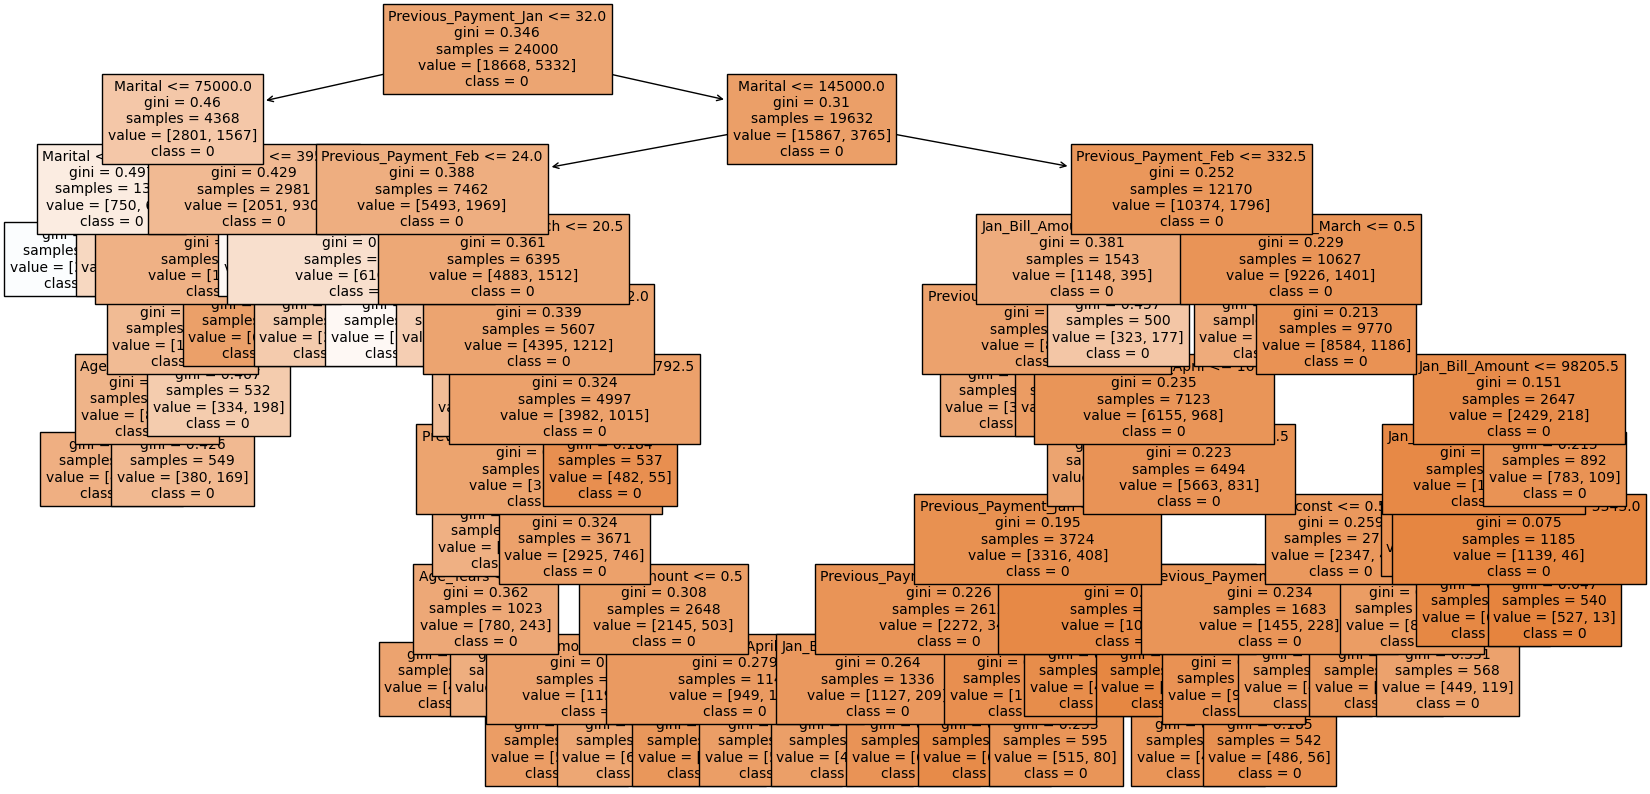

In [86]:
figure(figsize = [20, 10])
Dt2 = DecisionTreeClassifier(random_state = 123, min_samples_leaf = 500).fit(trainX_transform, y_train)
figure(figsize = [20, 10])
    
DT_Plot2 = plot_tree(Dt2, fontsize = 10, feature_names = trainX_transform.columns, 
                         filled = True, class_names = ["0","1"])
    

In [87]:
def Build_and_Evaluation(*args):
    
    DT = DecisionTreeClassifier(random_state = 123, min_samples_leaf = 500)
    DT.fit(trainX_transform,y_train)
    y_pred2 = DT.predict(testX_transform)
    print('Accuracy:- %.2f%%'%(accuracy_score(y_test,y_pred2)))
    
    
    print('______Model_Evaluation_______')
    print(classification_report(y_test,y_pred2))
    print('Confusion_matrix')
    Confusion_Mat =  pd.crosstab(y_test,y_pred2)
    print(Confusion_Mat) 
    print('Cross_val_score Accuracy of DecissionTreeModel %.2f%%:-'%np.mean(cross_val_score(DecisionTreeClassifier(),trainX_transform,y_train,scoring='accuracy',cv=10)))
    

In [88]:
Build_and_Evaluation(trainX_transform,y_train,y_test,testX_transform)

Accuracy:- 0.79%
______Model_Evaluation_______
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      4696
           1       0.56      0.08      0.15      1304

    accuracy                           0.79      6000
   macro avg       0.68      0.53      0.51      6000
weighted avg       0.74      0.79      0.72      6000

Confusion_matrix
col_0     0    1
row_0           
0      4610   86
1      1194  110
Cross_val_score Accuracy of DecissionTreeModel 0.69%:-


# RandomForest Model

In [89]:
def Build_and_Evaluation(*args):
    print('without Hyperparamerter tunning model')
    Rm = RandomForestClassifier()
    Rm.fit(trainX_transform,y_train)
    y_pred3 = Rm.predict(testX_transform)
    print('Accuracy:- %.2f%%'%(accuracy_score(y_test,y_pred3)))
    
    
    print('______Model_Evaluation_______')
    print(classification_report(y_test,y_pred3))
    print('Confusion_matrix')
    Confusion_Mat = confusion_matrix(y_test,y_pred3)
    print(Confusion_Mat) 
    print('Cross_val_score Accuracy of RandomforestModel %.2f%%:-'%np.mean(cross_val_score(RandomForestClassifier(),trainX_transform,y_train,scoring='accuracy',cv=10)))
    

In [90]:
Build_and_Evaluation(trainX_transform,y_train,y_test,testX_transform)

without Hyperparamerter tunning model
Accuracy:- 0.78%
______Model_Evaluation_______
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4696
           1       0.51      0.15      0.23      1304

    accuracy                           0.78      6000
   macro avg       0.65      0.56      0.55      6000
weighted avg       0.74      0.78      0.73      6000

Confusion_matrix
[[4502  194]
 [1106  198]]
Cross_val_score Accuracy of RandomforestModel 0.78%:-


## Hyparprameter Tunning Randomforest

In [91]:
def Hyperparameter_random_forest(*args):
    n_estimators = [10, 100, 1000]
    max_features = ['sqrt', 'log2']
    model_rn = RandomForestClassifier()
    grid = dict(n_estimators=n_estimators,max_features=max_features)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model_rn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(trainX_transform, y_train)
    print("Best Hyparmarameter: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
    y_pred4 = grid_search.predict(testX_transform)
    print('Accuracy:- %.2f%%'%(accuracy_score(y_test,y_pred4)))
    
    
    print('______Model_Evaluation_______')
    print(classification_report(y_test,y_pred4))
    print('Confusion_matrix')
    Confusion_Mat = confusion_matrix(y_test,y_pred4)
    print(Confusion_Mat)  

In [92]:
Hyperparameter_random_forest(trainX_transform,y_train,testX_transform,y_test)

Best Hyparmarameter: 0.781861 using {'max_features': 'sqrt', 'n_estimators': 1000}
Accuracy:- 0.78%
______Model_Evaluation_______
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4696
           1       0.51      0.15      0.23      1304

    accuracy                           0.78      6000
   macro avg       0.66      0.56      0.55      6000
weighted avg       0.74      0.78      0.74      6000

Confusion_matrix
[[4503  193]
 [1105  199]]


In [93]:
# Parameter select here
n_estimators_List = [25, 50, 75] # range(25,100,25)
max_features_List = [5, 7, 9] # range(5,11,2)
min_samples_leaf_List = [5, 10, 25, 50]

In [94]:
my_param_grid = {'n_estimators': n_estimators_List, 
                 'max_features': max_features_List, 
                 'min_samples_leaf' : min_samples_leaf_List} 


In [95]:
Grid_Search_Model = GridSearchCV(estimator = RandomForestClassifier(random_state=123), 
                     param_grid=my_param_grid,  
                     scoring='accuracy', 
                     cv=3).fit(trainX_transform, y_train)

In [96]:
Grid_Search_Model

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_features': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 25, 50],
                         'n_estimators': [25, 50, 75]},
             scoring='accuracy')

In [97]:
Model_Validation_Df4 = pd.DataFrame.from_dict(Grid_Search_Model.cv_results_)

In [98]:
Model_Validation_Df4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.805473,0.008541,0.057290,0.007364,5,5,25,"{'max_features': 5, 'min_samples_leaf': 5, 'n_...",0.780375,0.784125,0.784750,0.783083,0.001932,4
1,1.687562,0.063509,0.104152,0.007374,5,5,50,"{'max_features': 5, 'min_samples_leaf': 5, 'n_...",0.778375,0.785375,0.784125,0.782625,0.003048,7
2,2.619890,0.152260,0.160754,0.006386,5,5,75,"{'max_features': 5, 'min_samples_leaf': 5, 'n_...",0.778125,0.786375,0.783000,0.782500,0.003387,9
3,0.784322,0.033912,0.057279,0.007360,5,10,25,"{'max_features': 5, 'min_samples_leaf': 10, 'n...",0.781500,0.785000,0.782125,0.782875,0.001524,5
4,1.568358,0.083620,0.098953,0.007367,5,10,50,"{'max_features': 5, 'min_samples_leaf': 10, 'n...",0.777500,0.784000,0.783625,0.781708,0.002980,17
5,2.367800,0.248842,0.145356,0.014410,5,10,75,"{'max_features': 5, 'min_samples_leaf': 10, 'n...",0.777500,0.783500,0.783750,0.781583,0.002889,18
6,0.667975,0.047311,0.043064,0.005399,5,25,25,"{'max_features': 5, 'min_samples_leaf': 25, 'n...",0.778625,0.782000,0.779000,0.779875,0.001510,28
7,1.290516,0.064424,0.078126,0.000008,5,25,50,"{'max_features': 5, 'min_samples_leaf': 25, 'n...",0.777875,0.782125,0.781000,0.780333,0.001798,25
8,2.137637,0.180614,0.141211,0.013476,5,25,75,"{'max_features': 5, 'min_samples_leaf': 25, 'n...",0.777625,0.781625,0.781250,0.780167,0.001804,26
9,0.571370,0.041310,0.040373,0.009194,5,50,25,"{'max_features': 5, 'min_samples_leaf': 50, 'n...",0.778125,0.780000,0.778375,0.778833,0.000831,34


In [99]:
RF_Final = RandomForestClassifier(random_state = 123, n_estimators = 75,                                
                                  max_features = 9, min_samples_leaf = 5).fit(trainX_transform,y_train)

In [100]:
Test_Pred = RF_Final.predict(testX_transform)
print('Final RandomForest Model Accuracy %.2f%%:-'%accuracy_score(y_test,Test_Pred))

Final RandomForest Model Accuracy 0.79%:-


In [101]:
# Confusion Matrix
Confusion_Mat = pd.crosstab(y_test, Test_Pred) 
Confusion_Mat 


col_0,0,1
row_0,,
0,4500,196
1,1079,225


In [102]:
# Model Evaluation on Test Dataset
print(classification_report(y_test, Test_Pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4696
           1       0.53      0.17      0.26      1304

    accuracy                           0.79      6000
   macro avg       0.67      0.57      0.57      6000
weighted avg       0.75      0.79      0.74      6000



# Knn Model 

In [103]:
def Knn_model_Build_Evaluation(*args):
    # Data standarization
    Sc = StandardScaler()
    tr_std = Sc.fit(trainX_transform)
    train_std = tr_std.transform(trainX_transform)
    test_std  = tr_std.transform(testX_transform)

    # Convert standardize data into DataFrame
    trainX_std = pd.DataFrame(train_std,columns=X_train.columns)
    testX_std  = pd.DataFrame(test_std,columns=X_test.columns)
    
    # Drop unrelevent columns
    trainX_std.drop(columns=['Repayment_Status_March','Repayment_Status_April','Repayment_Status_May','Repayment_Status_June'],inplace=True)
    testX_std.drop(columns=['Repayment_Status_March','Repayment_Status_April','Repayment_Status_May','Repayment_Status_June'],inplace=True)
    
    # knn model Build
    Knn = KNeighborsClassifier()
    Knn.fit(trainX_std,y_train)
    y_pred5 = Knn.predict(testX_std)
    print('Accuracy of knn model %.2f%%:-'%(accuracy_score(y_test,y_pred5)))
    
    
    print('______Model_Evaluation_______')
    print(classification_report(y_test,y_pred5))
    print('Confusion_matrix')
    Confusion_Mat = confusion_matrix(y_test,y_pred5)
    print(Confusion_Mat)  
     

In [104]:
Knn_model_Build_Evaluation(X_train,X_test,trainX_transform,testX_transform,y_train,y_test)

Accuracy of knn model 0.76%:-
______Model_Evaluation_______
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4696
           1       0.36      0.16      0.22      1304

    accuracy                           0.76      6000
   macro avg       0.58      0.54      0.54      6000
weighted avg       0.70      0.76      0.72      6000

Confusion_matrix
[[4337  359]
 [1100  204]]


# SVM Model

In [114]:
def smv_model_evaluation(*args):
   
    Sc = StandardScaler()
    tr_std = Sc.fit(trainX_transform)
    train_std = tr_std.transform(trainX_transform)
    test_std  = tr_std.transform(testX_transform)
    
    
    # Convert standardize data into DataFrame
    trainX_std = pd.DataFrame(train_std,columns=X_train.columns)
    testX_std  = pd.DataFrame(test_std,columns=X_test.columns)
     
    # Drop unrelevent columns
    trainX_std.drop(columns=['Repayment_Status_March','Repayment_Status_April','Repayment_Status_May','Repayment_Status_June'],inplace=True)
    testX_std.drop(columns=['Repayment_Status_March','Repayment_Status_April','Repayment_Status_May','Repayment_Status_June'],inplace=True)
    
    
    svm = SVC()
    svm.fit(trainX_std,y_train)
    y_pred6 = svm.predict(testX_std)
    print('SVM model Accuracy:- %.2f%%'%(accuracy_score(y_test,y_pred6)))
    
    
    print('______Model_Evaluation_______')
    print(classification_report(y_test,y_pred6))
    print('Confusion_matrix')
    Confusion_Mat =  pd.crosstab(y_test,y_pred6)
    print(Confusion_Mat) 
    print('Cross_val_score Accuracy of SVM model %.2f%%:-'%np.mean(cross_val_score(SVC(),trainX_std,y_train,scoring='accuracy',cv=10)))
    

In [115]:
smv_model_evaluation(trainX_transform,y_train,testX_transform,y_test)

SVM model Accuracy:- 0.78%
______Model_Evaluation_______
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4696
           1       0.00      0.00      0.00      1304

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000

Confusion_matrix
col_0     0
row_0      
0      4696
1      1304
Cross_val_score Accuracy of SVM model 0.78%:-


In [116]:
model_2 = SVC(kernel='poly') # Polynomial kernal
model_2.fit(trainX_transform,y_train)

SVC(kernel='poly')

In [117]:
Test_class_2 = model_2.predict(testX_transform)

In [118]:
con_2 = confusion_matrix(y_test,Test_class_2)
con_2

array([[4696,    0],
       [1304,    0]], dtype=int64)

In [119]:
print('Accuracy of SVM %.2f%%:-'%accuracy_score(y_test,Test_class_2))

Accuracy of SVM 0.78%:-


In [120]:
# Classification report
print(classification_report(y_test,Test_class_2))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4696
           1       0.00      0.00      0.00      1304

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



In [121]:
# Hyparparameter Tunnig and cross validation
my_cost = [0.1,1,2]
my_kernal = ['Sigmoid','rbf']
my_combo = len(my_cost)*len(my_kernal)

In [122]:
from sklearn.model_selection import RandomizedSearchCV
myCost = [0.1, 1, 2]
myKernel = ['sigmoid','rbf']
myCombo = len(myCost)*len(myKernel)

my_param_grid = {'C': myCost, 'kernel': myKernel}
SVM_RandomSearchCV = RandomizedSearchCV(SVC(), param_distributions = my_param_grid,  
                                        scoring = 'f1', cv = 3, n_jobs = -1, 
                                        n_iter = int(0.7*myCombo),
                                        random_state = 123).fit(trainX_transform,y_train)

In [123]:
Model_Evaluation_SVC = pd.DataFrame.from_dict(SVM_RandomSearchCV.cv_results_)

In [124]:
Model_Evaluation_SVC

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,23.443225,0.476495,23.748764,0.254988,rbf,0.1,"{'kernel': 'rbf', 'C': 0.1}",0.000000,0.000000,0.000000,0.000000,0.000000,3
1,26.379914,0.490786,24.837429,0.682650,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.000000,0.000000,0.000000,0.000000,0.000000,3
2,20.294556,2.496995,6.362399,0.570631,sigmoid,2,"{'kernel': 'sigmoid', 'C': 2}",0.232869,0.219348,0.211717,0.221311,0.008746,1
3,17.958810,0.165779,4.968834,0.212928,sigmoid,0.1,"{'kernel': 'sigmoid', 'C': 0.1}",0.217176,0.201064,0.203247,0.207163,0.007136,2


In [125]:
# Before sampling Majority and Minerty
y_train = pd.DataFrame(y_train)
y_train.value_counts()


0    18668
1     5332
dtype: int64

In [129]:
# Data standardization Here
Sc = StandardScaler()
tr_std = Sc.fit(trainX_transform)
train_std = tr_std.transform(trainX_transform)
test_std  = tr_std.transform(testX_transform)
    
    
# Convert standardize data into DataFrame
trainX_std = pd.DataFrame(train_std,columns=X_train.columns)
testX_std  = pd.DataFrame(test_std,columns=X_test.columns)

# Data Imvailest Avoid Here 
# Data Sampling Majority to cnvert Minerty

RUS = RandomUnderSampler(sampling_strategy = 0.7, random_state = 123)
trainX_RUS, trainY_RUS = RUS.fit_resample(trainX_std,y_train)
trainX_RUS = pd.DataFrame(trainX_RUS)
#trainY_RUS = pd.Series(trainY_RUS)


# Convert Sampling Data into DataFrame
train_X_RUS = pd.DataFrame(trainX_RUS)
train_y_RUS = pd.DataFrame(trainY_RUS)

In [130]:
# perecetage of majority and minerity
trainY_RUS.value_counts()  

trainY_RUS.value_counts()[1]/sum(trainY_RUS.value_counts())*100 # Percentage of 1s
trainY_RUS.value_counts()[1]/trainY_RUS.value_counts()[0] # Ratio of 1s to 0s


0.700013128528292

In [132]:
# After Standarization SVM model
M5 = SVC()
M5_Model = M5.fit(trainX_RUS, trainY_RUS) 
Test_Class = M5_Model.predict(testX_std)
Confusion_Mat = confusion_matrix(y_test, Test_Class)
Confusion_Mat


array([[3723,  973],
       [ 703,  601]], dtype=int64)

In [133]:
# This is final model Accuarcy of SVM
sum(np.diagonal(Confusion_Mat))/testX_transform.shape[0]*100
print(classification_report(y_test, Test_Class))


              precision    recall  f1-score   support

           0       0.84      0.79      0.82      4696
           1       0.38      0.46      0.42      1304

    accuracy                           0.72      6000
   macro avg       0.61      0.63      0.62      6000
weighted avg       0.74      0.72      0.73      6000



# LogisticRegression Statistical Model

In [134]:
final1.head(2)

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1


In [135]:
final2 = pd.get_dummies(final1,drop_first = True)

In [136]:
final2.shape

(30000, 25)

# Data seprate into two parts

In [137]:
X = final2.drop(columns=['Default_Payment'],axis=1)
y = final2['Default_Payment']

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,train_size=0.80)

In [139]:
X_train.shape

(24000, 24)

In [140]:
X_test.shape

(6000, 24)

In [141]:
y_train.shape

(24000,)

# Add constant Column

In [142]:
X_train = add_constant(X_train)
X_test  = add_constant(X_test)

# VIF check Multicollinearty

In [143]:
max_vi  = 10
cutt_vi = 10
train   = X_train.copy()
High_vi = []
while (max_vi >= cutt_vi):
    VIF = pd.DataFrame()
    VIF['vif'] = [variance_inflation_factor(train.values,i)for i in range(train.shape[1])]
    VIF['Feature'] = train.columns
    VIF.dropna(inplace=True)
    colname = VIF.sort_values(['vif'],ascending=False).iloc[0,1]
    max_vi  = VIF.sort_values(['vif'],ascending=False).iloc[0,0]
    if (max_vi >= cutt_vi):
        train = train.drop(colname,axis=1)
        High_vi.append(colname)

In [144]:
High_vi

['const', 'May_Bill_Amount', 'March_Bill_Amount', 'Age_Years']

In [145]:
High_vi.remove('const')

In [146]:
X_train = X_train.drop(High_vi,axis=1)
X_test  = X_test.drop(High_vi,axis=1)

In [147]:
m1 = Logit(y_train,X_train).fit()
m1.summary()

Optimization terminated successfully.
         Current function value: 0.446023
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Default_Payment   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23978
Method:                           MLE   Df Model:                           21
Date:                Tue, 29 Nov 2022   Pseudo R-squ.:                  0.1579
Time:                        17:10:32   Log-Likelihood:                -10705.
converged:                       True   LL-Null:                       -12711.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.9003      0.107     -8.395      0.000      -1.110      -0.690
Customer ID            -1.246e-06   2.01e-06     -0.620      0.535   -5.18e-06    2.69e-06
Credit_Amount          -1.248e-06    1.6e-07     -7.825      0.000   -1.56e-06   -9.36e-07
Gender                    -0.1471      0.035     -4.187      0.000      -0.216      -0.078
Academic_Qualification    -0.0535      0.023     -2.287      0.022      -0.099      -0.008
Marital                   -0.1618      0.034     -4.774      0.000      -0.228      -0.095
Repayment_Status_Jan       0.8699      0.028     30.925      0.000       0.815       0.925
Repayment_Status_Feb       0.0458      0.030      1.542      0.123      -0.012       0.104
Repayment_Status_March     0.1444      0.032      4.555      0.000       0.082       0.207
Repayment_Status_April     0.0482      0.036      1.348      0.178      -0.022       0.118
Repayment_Status_May       0.1121      0.038      2.957      0.003       0.038       0.186
Repayment_Status_June      0.1900      0.032      5.897      0.000       0.127       0.253
Jan_Bill_Amount        -1.033e-06    3.4e-07     -3.041      0.002    -1.7e-06   -3.67e-07
Feb_Bill_Amount         1.855e-06   5.43e-07      3.415      0.001    7.91e-07    2.92e-06
April_Bill_Amount       5.427e-07   6.43e-07      0.843      0.399   -7.18e-07     1.8e-06
June_Bill_Amount       -2.638e-08   8.05e-07     -0.033      0.974    -1.6e-06    1.55e-06
Previous_Payment_Jan   -8.755e-06   1.99e-06     -4.403      0.000   -1.27e-05   -4.86e-06
Previous_Payment_Feb   -5.639e-06   1.48e-06     -3.814      0.000   -8.54e-06   -2.74e-06
Previous_Payment_March -4.489e-06    1.7e-06     -2.636      0.008   -7.83e-06   -1.15e-06
Previous_Payment_April  -3.97e-06   1.76e-06     -2.253      0.024   -7.42e-06   -5.17e-07
Previous_Payment_May   -2.157e-06   1.55e-06     -1.394      0.163   -5.19e-06    8.75e-07
Previous_Payment_June   -2.79e-06   1.42e-06     -1.961      0.050   -5.58e-06   -2.08e-09
==========================================================================================
"""

In [148]:
# Probability of TestX predict
X_test['Test_Prob'] = m1.predict(X_test)

In [149]:
X_test['Test_Prob'][0:5]

25665    0.133731
16464    0.164537
22386    0.686428
10149    0.146131
8729     0.196791
Name: Test_Prob, dtype: float64

In [150]:
# Actual Test_y
y_test[0:5]

25665    0
16464    0
22386    1
10149    1
8729     0
Name: Default_Payment, dtype: int64

In [151]:
# Classify 0 or 1 based on 0.5 cutoff
X_test['Test_class'] = np.where(X_test['Test_Prob']>=0.5,1,0)

In [152]:
# Predicted TestX class
X_test['Test_class'][0:5]

25665    0
16464    0
22386    1
10149    0
8729     0
Name: Test_class, dtype: int32

In [153]:
# Actual Test_y class
y_test[0:5]

25665    0
16464    0
22386    1
10149    1
8729     0
Name: Default_Payment, dtype: int64

In [154]:
# Confusion_Matrix
confusion_matrix_1 = pd.crosstab(X_test['Test_class'],y_test) # Actual Row side and predicted column side

In [155]:
confusion_matrix_1

Default_Payment,0,1
Test_class,,
0,4471,866
1,225,438


In [156]:
# Check the accuracy of the model
print('Accuracy of LogisticRegression Statistical model:- %.2f%%'%(sum(np.diagonal(confusion_matrix_1)/X_test.shape[0])*100))

Accuracy of LogisticRegression Statistical model:- 81.82%


# Model Evaluation Without drop Insignificant columns

In [157]:
# Find out precision , F1_score and Recall
print(classification_report(y_test,X_test['Test_class']))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.66      0.34      0.45      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



# Roc And Auc curve

In [158]:
# Predict on Train dataset and find best Thresold value and TPR
Train_Prob = m1.predict(X_train)

In [159]:
# Calculate FPR and TPR cutoff Table
# Based on ROC curve find the best thresold value in our model

fpr,tpr,cutoff = roc_curve(y_train,Train_Prob) # pass train data Dependent train data probility

In [160]:
# Cutoff Table Cretion
cutoff_Table = pd.DataFrame()
cutoff_Table['FPR'] = fpr
cutoff_Table['TPR'] = tpr
cutoff_Table['cutoff'] = cutoff

In [161]:
# Es ROC curve se -- all over mera yehi objective hai
# Hame aese thresold ka value select karna hai jha me high TPR ho aur low FPR ka value ho 
# Hame aese thresld dicide karna hai 
#sns.lineplot(cutoff_Table['FPR'],cutoff_Table['TPR'])
#plt.show()

In [162]:
# Actual model Preformance
# Ager hum kitna bhi thresold change karte hai to AUC ka value change me koi chnage nhi hoga
print('AUC curve model performance model accuracy:- %.2f%%:-'%auc(fpr,tpr))

AUC curve model performance model accuracy:- 0.76%:-


In [163]:
# Calculate FPR and TPR cutoff Table
# Based on ROC curve find the best thresold value in our model
# Es ROC curve se -- all over mera yehi objective hai
# Hame aese thresold ka value select karna hai jha me high TPR ho aur low FPR ka value ho 
# Hame aese thresld dicide karna hai 

In [164]:
cutoff_Table.sample(5)

,FPR,TPR,cutoff
1465,0.060264,0.399662,0.404342
2517,0.147364,0.544824,0.243137
6572,0.926666,0.986122,0.086564
6475,0.896882,0.976182,0.095860
4369,0.413167,0.757314,0.154129


In [165]:
# Calculate Difference Bitween TPR and FPR and find out new cutoff (TPR-FPR) karne ke baad jo hame value milega
# Excel me 
cutoff_Table['Diffirence'] = cutoff_Table['TPR'] - cutoff_Table['FPR']

In [166]:
cutoff_Table.sample(2)

,FPR,TPR,cutoff,Diffirence
691,0.025391,0.225619,0.591795,0.200228
3374,0.247589,0.646099,0.177825,0.398510


In [171]:
# Save in our directory 
cutoff_Table.to_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\data\\Cout.csv')

In [172]:
#New_Cutoff = Table_cutoff[(Table_cutoff['TPR']-Table_cutoff['FPR']) == max (Table_cutoff['TPR']-Table_cutoff['FPR'])]['Cutoff']

In [173]:
# Best Cutoff find out finali using ROC curve
best_cutoff = cutoff_Table[(cutoff_Table['TPR']-cutoff_Table['FPR']) == max(cutoff_Table['TPR']-cutoff_Table['FPR'])]['cutoff']

In [174]:
cutoff_Table[(cutoff_Table['TPR']-cutoff_Table['FPR']) == max(cutoff_Table['TPR']-cutoff_Table['FPR'])]

,FPR,TPR,cutoff,Diffirence
2854,0.182558,0.58871,0.202734,0.406151


In [175]:
X_test['Test_class2'] = np.where(X_test['Test_Prob'] >= 0.196178,1,0)

In [176]:
best_cutoff

2854    0.202734
Name: cutoff, dtype: float64

In [177]:
# Confusion matrix
confusion_matrix(y_test,X_test['Test_class2'])

array([[3724,  972],
       [ 506,  798]], dtype=int64)

In [178]:
confusion_matrix(y_test,X_test['Test_class'])

array([[4471,  225],
       [ 866,  438]], dtype=int64)

In [179]:
# Finali Model evaluation
print(classification_report(y_test,X_test['Test_class2']))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4696
           1       0.45      0.61      0.52      1304

    accuracy                           0.75      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.75      0.77      6000

